<a href="https://colab.research.google.com/github/nk12889/Cohort-London/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


# **GitHub Link**

https://github.com/nk12889/Cohort-London

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# import Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#to display all the graph in the workbook
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})
import warnings
warnings.filterwarnings("ignore")

In [2]:
#data path
data='https://raw.githubusercontent.com/Aaryant31/Bike-Sharing-Demand-Prediction/main/SeoulBikeData.csv'

In [3]:
#creating dataframe of data
df = pd.read_csv(data, encoding = "ISO-8859-1")

# Exploratory data analysis

In [4]:
#seeing top 5 row of data
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [5]:
#checking shape of data
df.shape

(8760, 14)

In [6]:
#checking info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [8]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [9]:
#checking description of data
df.describe().transpose()

count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80

In [10]:
#converting date columns to Date format
df['Date']= pd.to_datetime(df['Date'])

In [11]:
# extracting day,month, day of week and weekdays/weekend from date column
df['Date']=pd.to_datetime(df['Date'])
df['month'] = df['Date'].apply(lambda x : x.month)
df['day_of_week'] = df['Date'].dt.day_name()
df['weekdays_weekend']=df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date','day_of_week'],axis=1)

<Axes: >

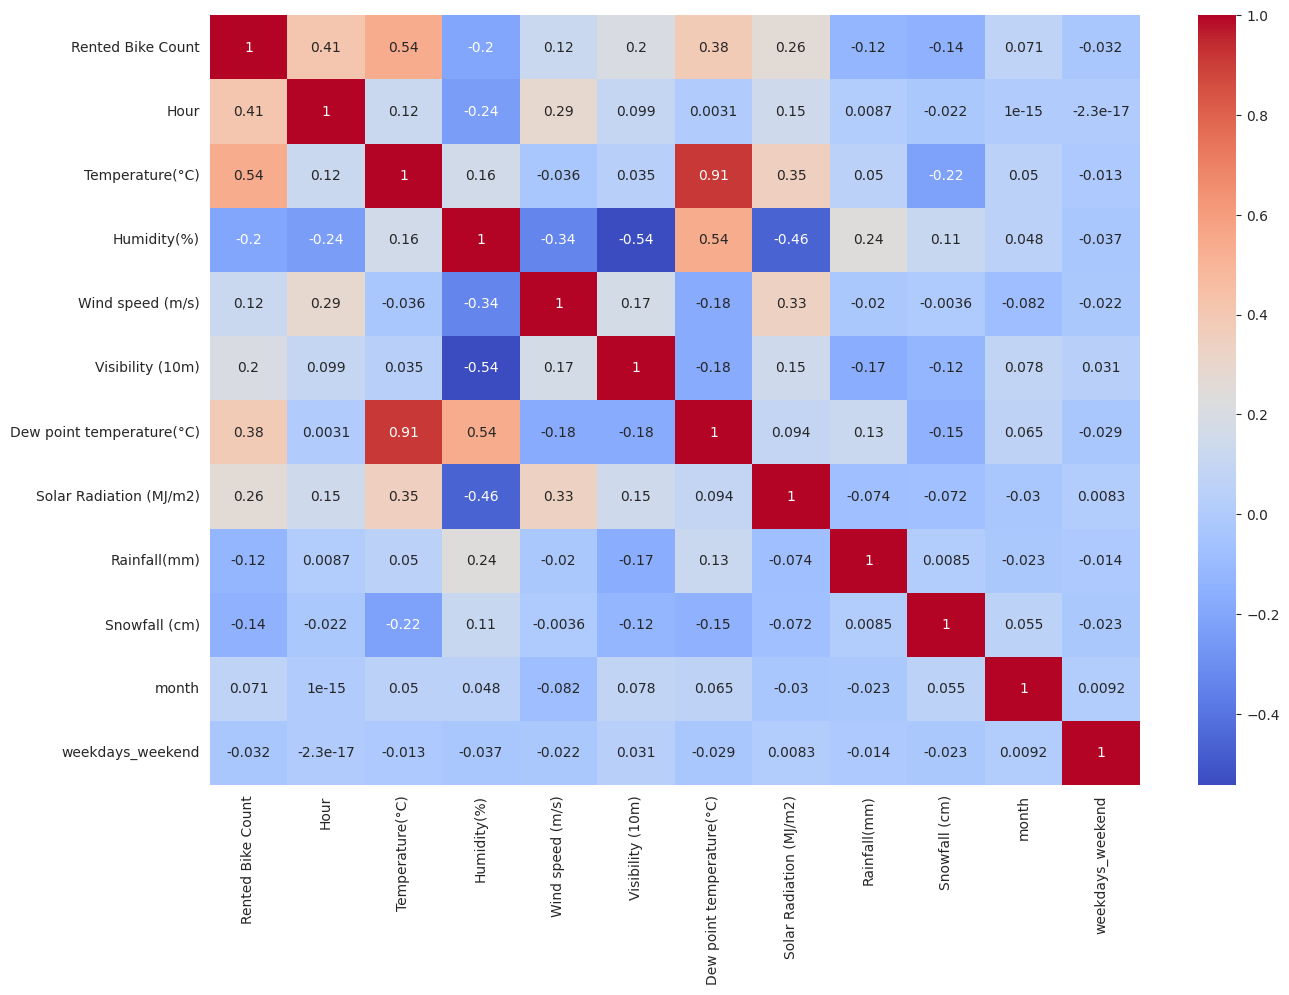

In [12]:
#checking correlation with the help of heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [13]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

   return(vif)

In [14]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)'] ]])


variables       VIF
0                     Hour  3.961874
1          Temperature(°C)  3.236809
2              Humidity(%)  6.114153
3         Wind speed (m/s)  4.616621
4         Visibility (10m)  5.404128
5  Solar Radiation (MJ/m2)  2.272068
6             Rainfall(mm)  1.081252
7            Snowfall (cm)  1.125304
8                    month  4.580307
9         weekdays_weekend  1.399708

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

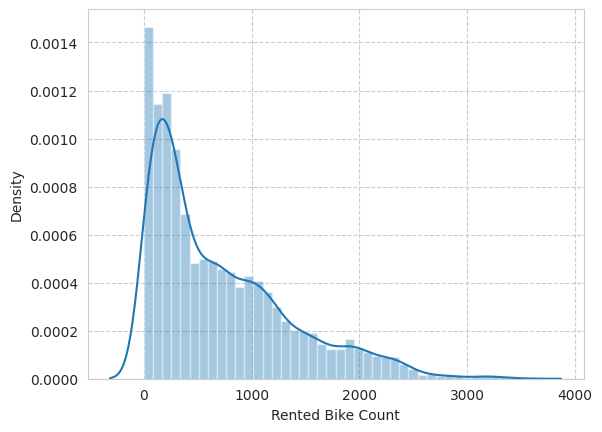

In [15]:
#visualising distribution of rented bike count
sns.distplot(df['Rented Bike Count'])

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

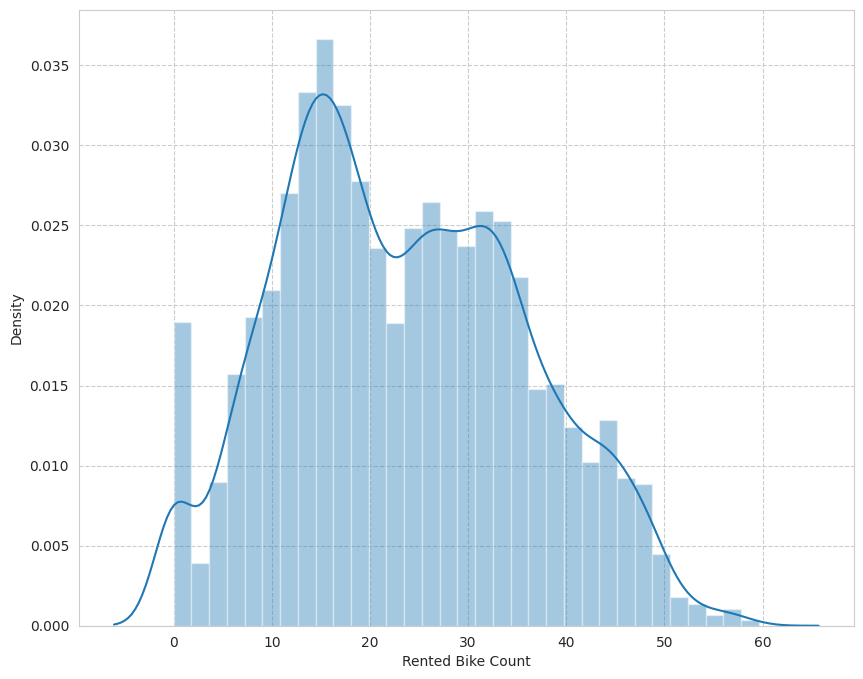

In [16]:
#transforming square_root transformation
plt.figure(figsize=(10,8))
sns.distplot(np.sqrt(df['Rented Bike Count']))

In [17]:
#extracting numeric columns
numeric_features= df.select_dtypes(exclude='object')

In [18]:
#numeric columns info
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  month                      8760 non-null   int64  
 11  weekdays_weekend           8760 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 821.4 KB


In [19]:
#describing numeric feature
numeric_features.describe().transpose()

count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   
month                      8760.0     6.526027    3.448048   1.0    4.00   
weekdays_weekend           8760.0     0.290411    0.453978   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80  
month                         7.00    10.00    12.00  
weekdays_weekend              0.00     1.00     1.00

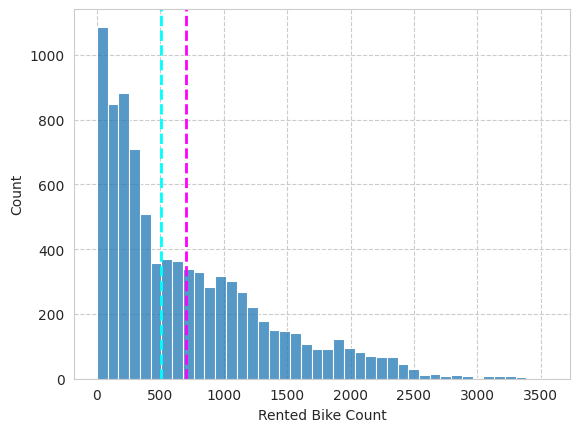

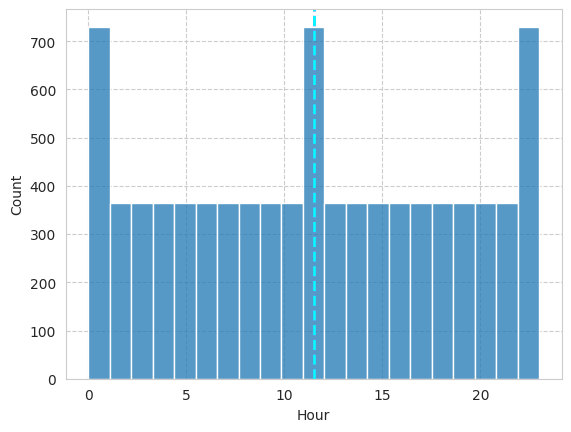

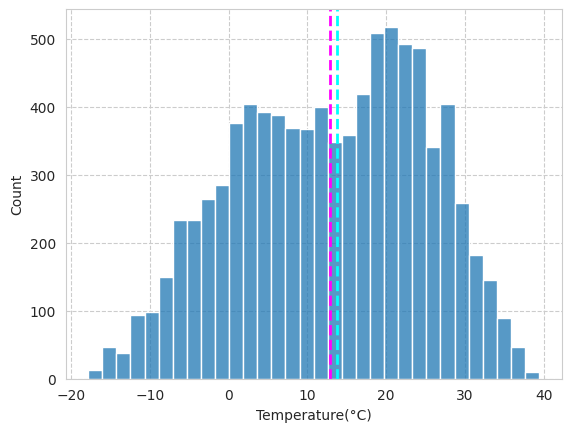

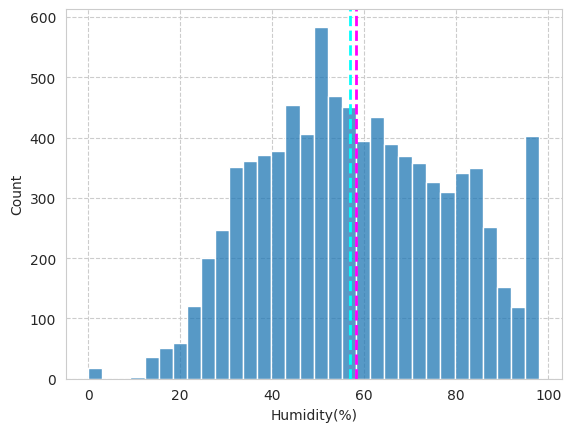

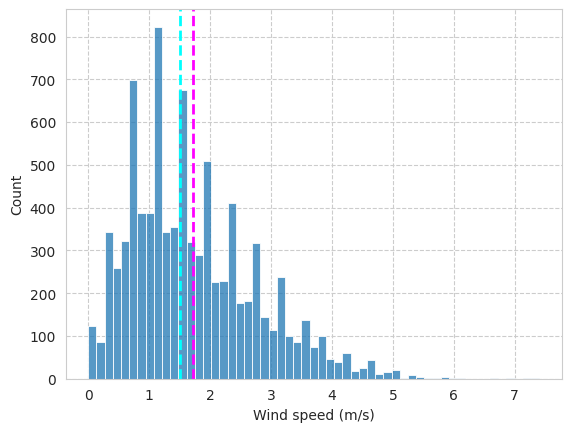

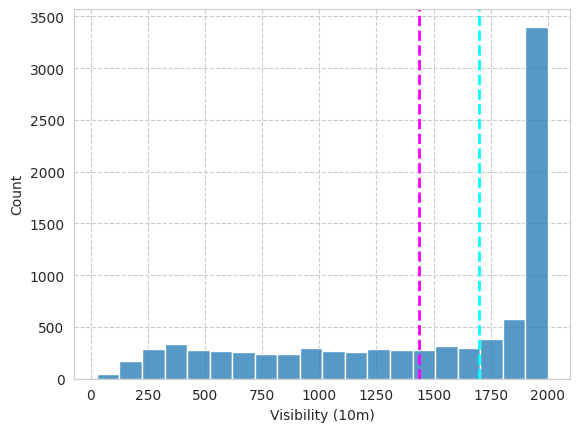

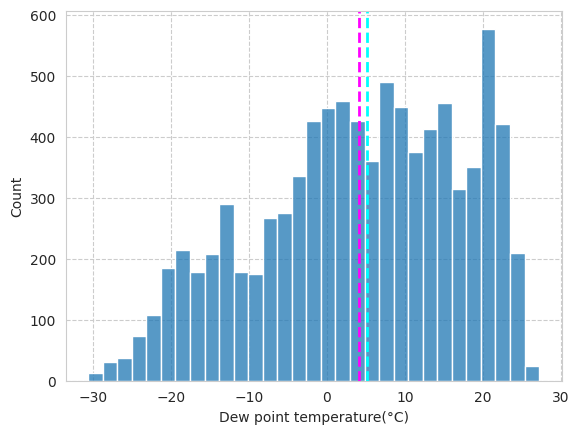

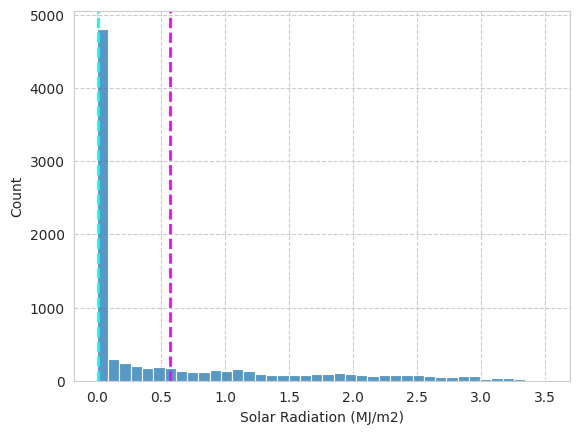

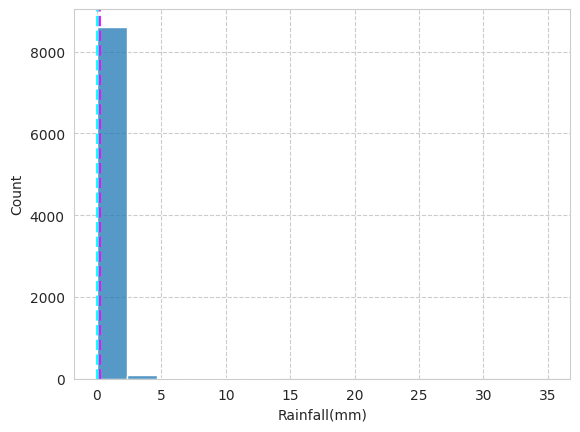

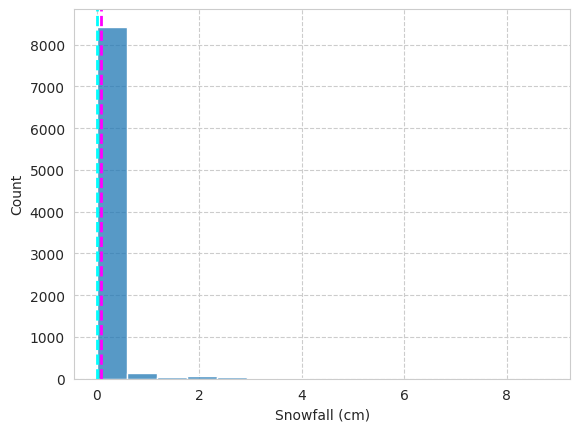

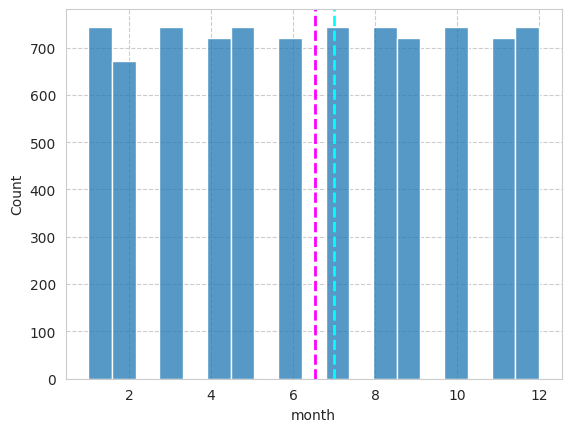

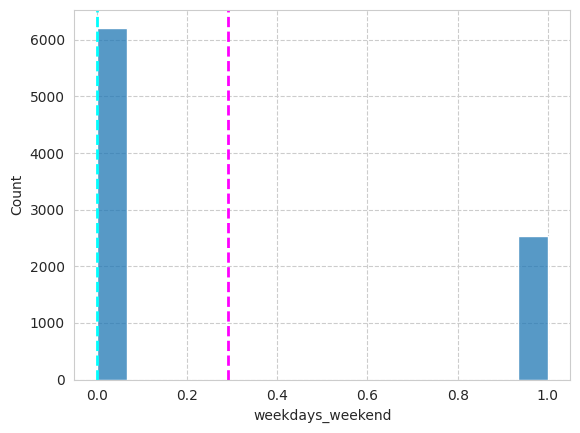

In [20]:
#plotting histogram of dataset
for col in numeric_features[:]:
  sns.histplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.show()

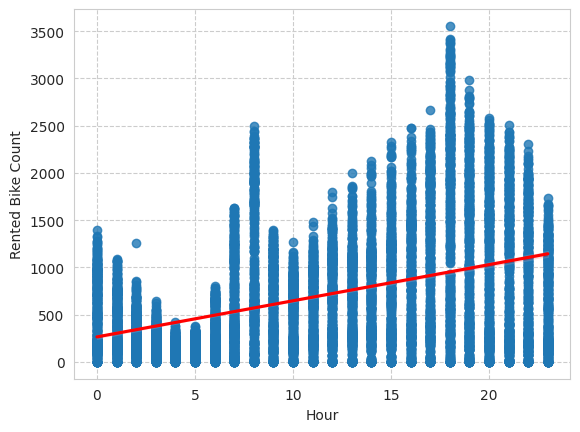

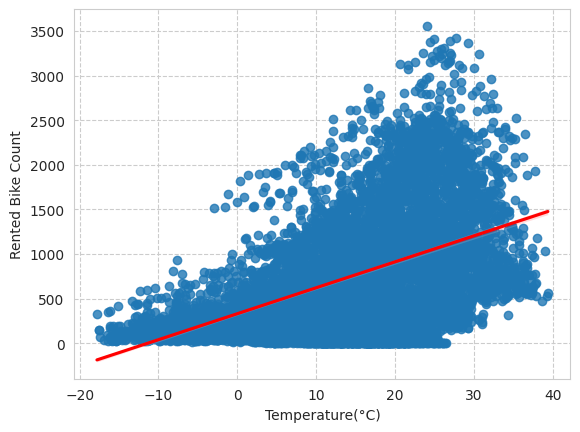

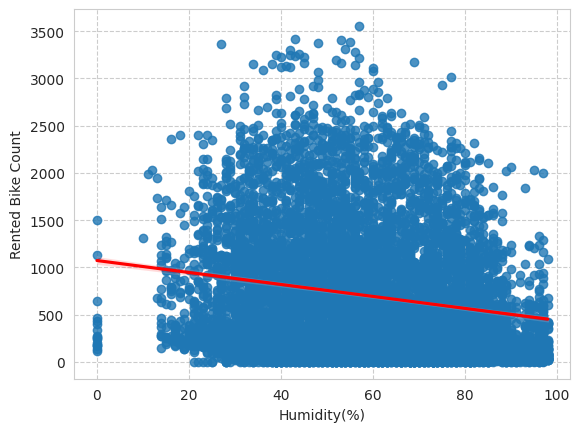

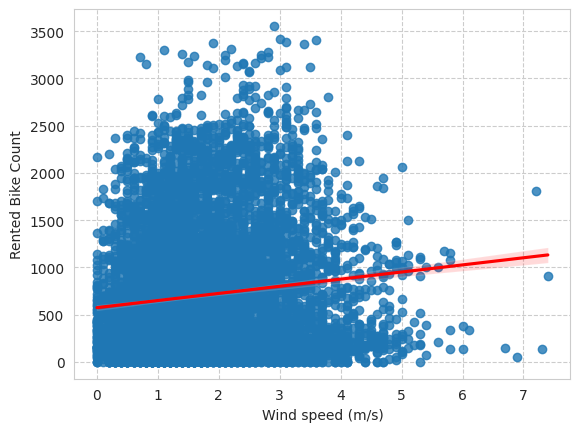

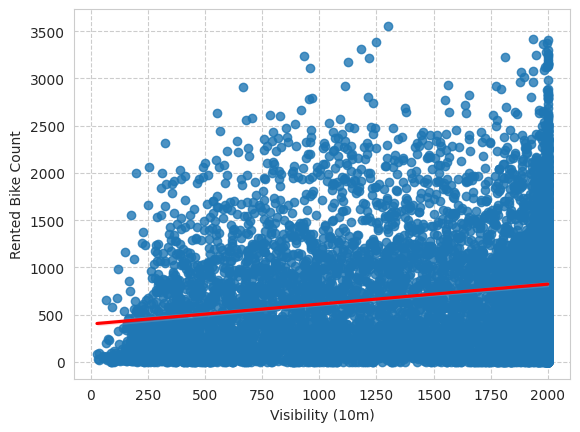

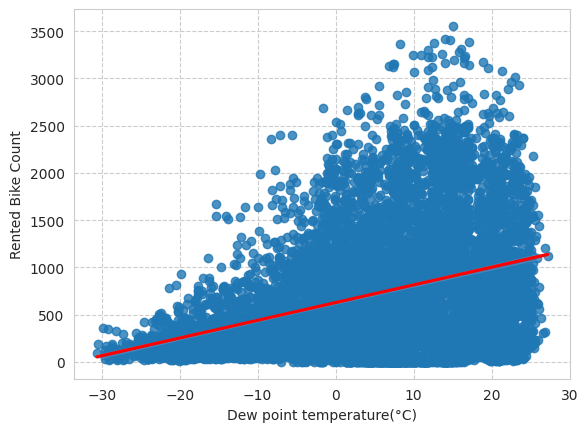

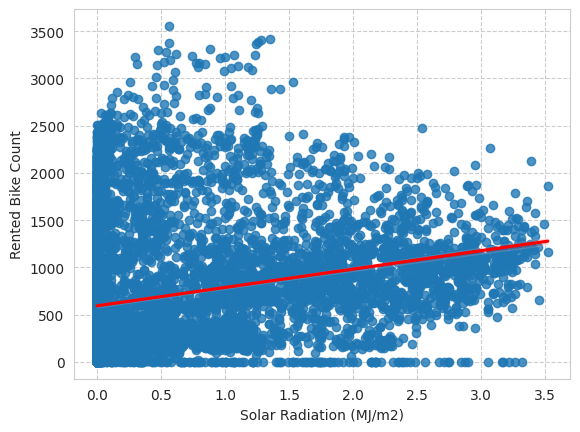

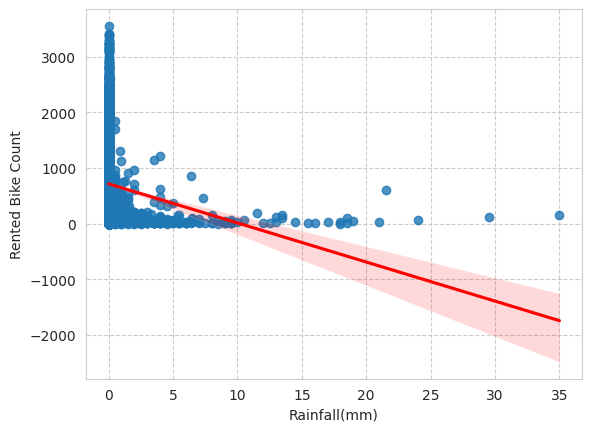

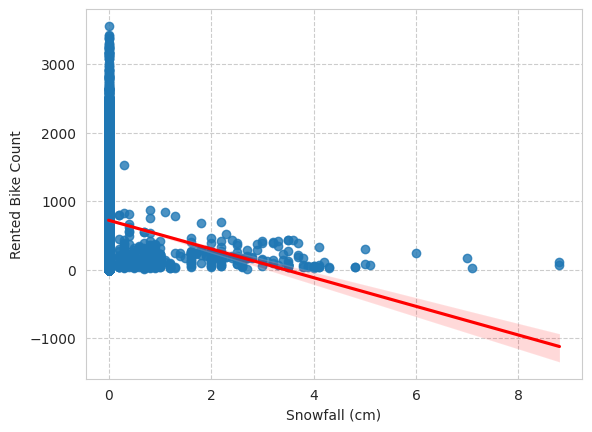

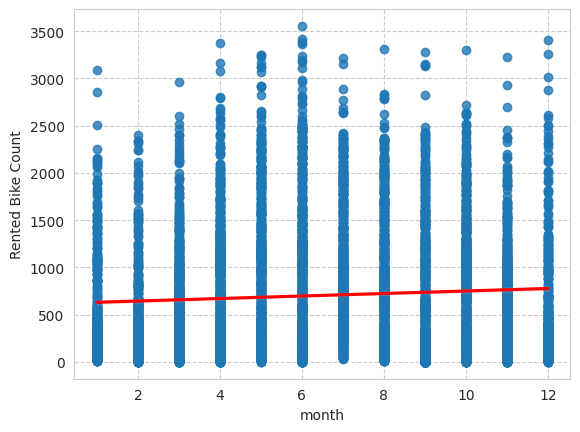

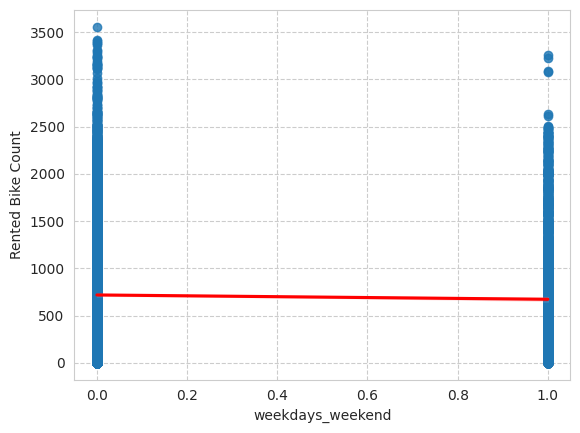

In [21]:
# ploting Regression plot of each columns of dataset v/s rented bike count columns
for col in numeric_features[:]:
  if col == 'Rented Bike Count':
    pass
  else:
    sns.regplot(x=df[col],y=df["Rented Bike Count"],line_kws={"color": "red"})

  plt.show()

In [22]:
#Extracting categorical columns
categorical_features= df.select_dtypes(include='object')

In [23]:
categorical_features

Seasons     Holiday Functioning Day
0     Winter  No Holiday             Yes
1     Winter  No Holiday             Yes
2     Winter  No Holiday             Yes
3     Winter  No Holiday             Yes
4     Winter  No Holiday             Yes
...      ...         ...             ...
8755  Autumn  No Holiday             Yes
8756  Autumn  No Holiday             Yes
8757  Autumn  No Holiday             Yes
8758  Autumn  No Holiday             Yes
8759  Autumn  No Holiday             Yes

[8760 rows x 3 columns]

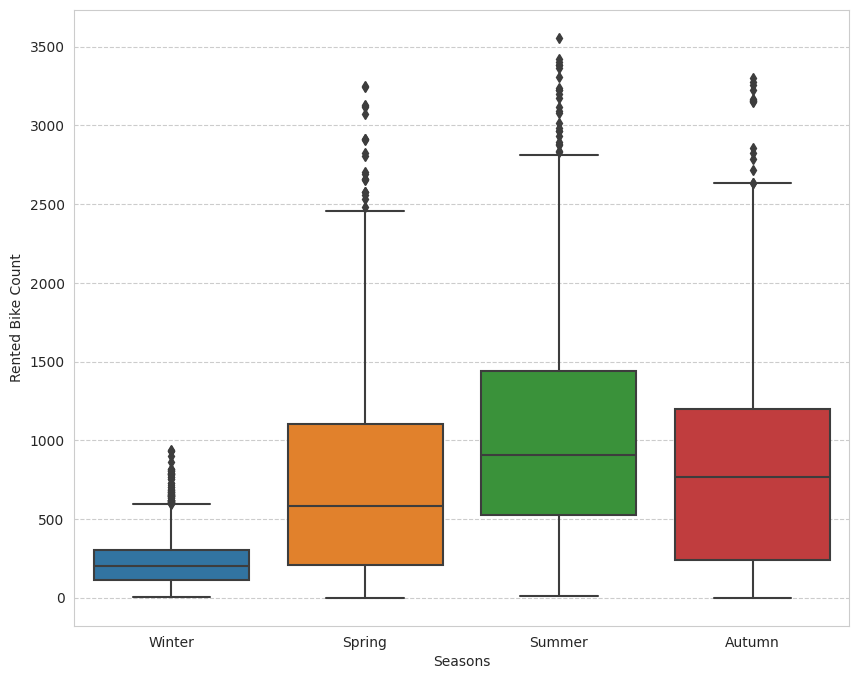

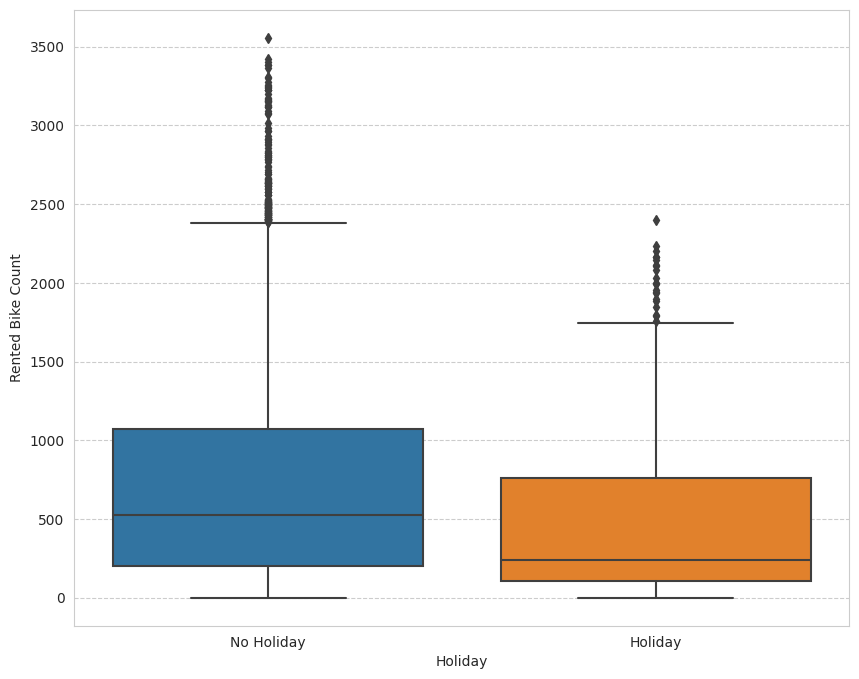

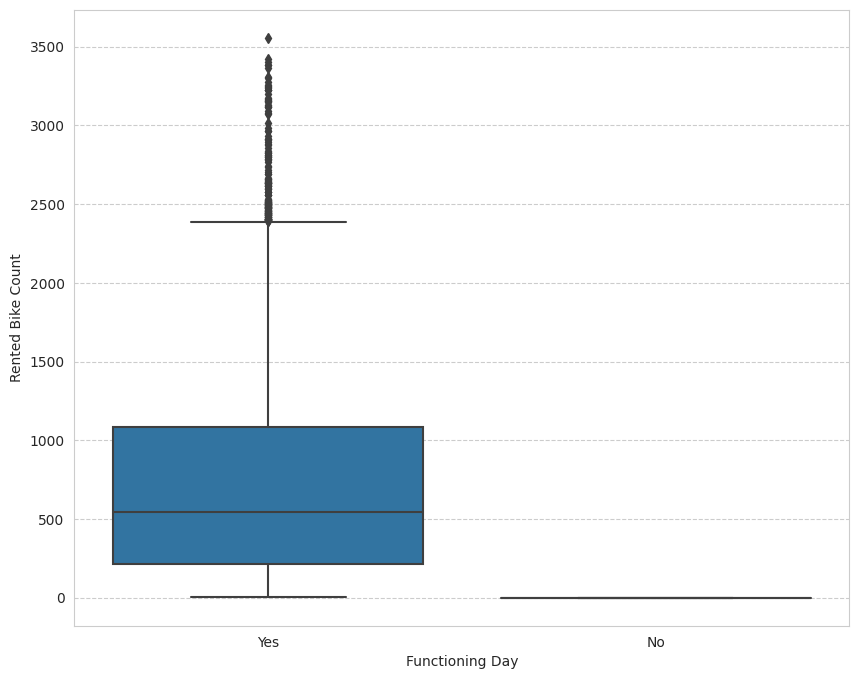

In [24]:
#ploting Box plot to visualize and trying to get information from plot
for col in categorical_features:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=df[col],y=df["Rented Bike Count"])
  plt.show()

 Conclusion
- Less demand on winter seasons
- Sligthly Higher demand during Non holidays
- Almost no demnad on non functioning day

In [25]:
#checking counts of functioning day
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

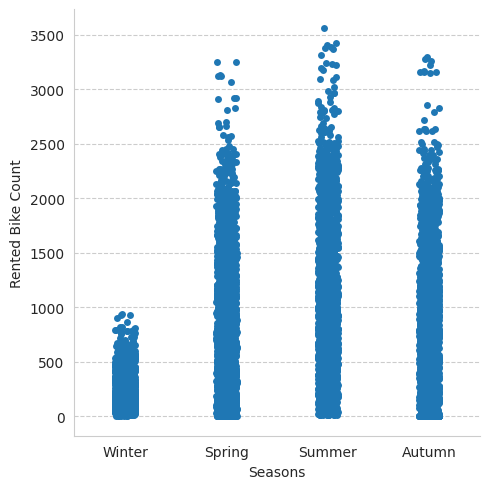

In [26]:
#ploting cat plot for more info
sns.catplot(x='Seasons',y='Rented Bike Count',data=df)

Conclusion

**we can clearly see that there is less demand of rented bike during winter season**

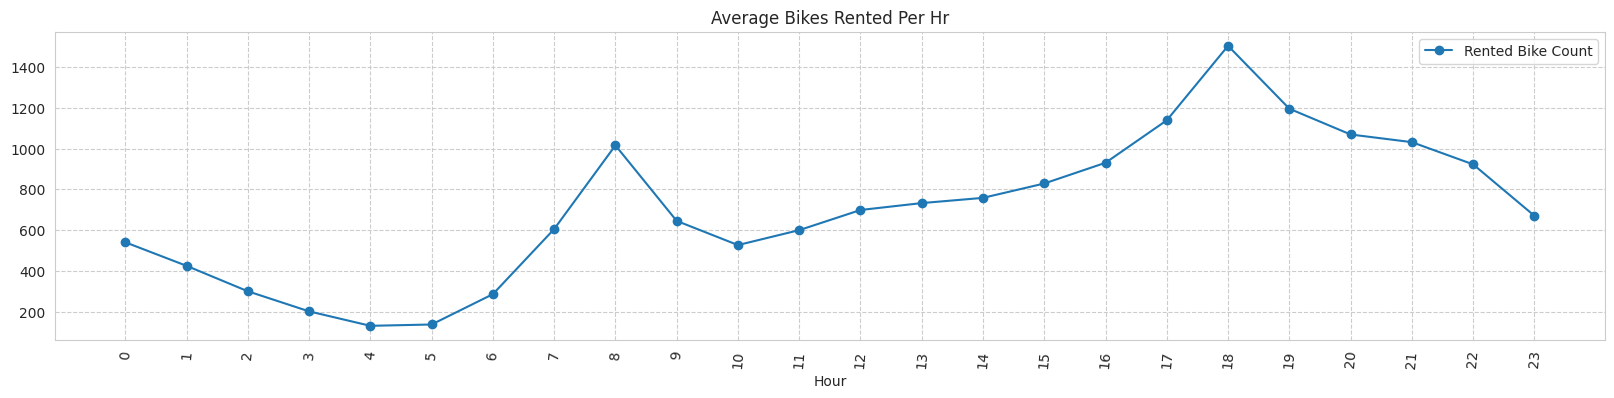

In [27]:
#ploting line graph
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = df.groupby('Hour')['Rented Bike Count'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(20,4))
a=avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hr")
a.set_xticks(range(len(avg_rent_hrs)));
a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85);



Conclusion

- High rise of Rented Bikes from 8:00 a.m to 9:00 p.m
     means people prefer rented bike during rush hour.



- we can clearly see that demand rises most at 8 a.m and 6:00 p.m so we can say that that during office opening and closing time there is much high demand





In [28]:
#creating Dummy variable for categorical columns
dummy_categorical_feature= pd.get_dummies(categorical_features,drop_first=True)

In [29]:
dummy_categorical_feature

Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
0                  0               0               1                   1   
1                  0               0               1                   1   
2                  0               0               1                   1   
3                  0               0               1                   1   
4                  0               0               1                   1   
...              ...             ...             ...                 ...   
8755               0               0               0                   1   
8756               0               0               0                   1   
8757               0               0               0                   1   
8758               0               0               0                   1   
8759               0               0               0                   1   

      Functioning Day_Yes  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
...                   ...  
8755                    1  
8756                    1  
8757                    1  
8758                    1  
8759                    1  

[8760 rows x 5 columns]

In [30]:
#concating numeric columns and dummy columns and creating final df
final_df= pd.concat([dummy_categorical_feature,numeric_features],axis=1)

In [31]:
#showing head of final df
final_df.head()

Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
0               0               0               1                   1   
1               0               0               1                   1   
2               0               0               1                   1   
3               0               0               1                   1   
4               0               0               1                   1   

   Functioning Day_Yes  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0                    1                254     0             -5.2           37   
1                    1                204     1             -5.5           38   
2                    1                173     2             -6.0           39   
3                    1                107     3             -6.2           40   
4                    1                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  month  \
0                      0.0           0.0            0.0      1   
1                      0.0           0.0            0.0      1   
2                      0.0           0.0            0.0      1   
3                      0.0           0.0            0.0      1   
4                      0.0           0.0            0.0      1   

   weekdays_weekend  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [32]:
#describing final DF
final_df.describe().transpose()

count         mean         std   min     25%  \
Seasons_Spring             8760.0     0.252055    0.434217   0.0    0.00   
Seasons_Summer             8760.0     0.252055    0.434217   0.0    0.00   
Seasons_Winter             8760.0     0.246575    0.431042   0.0    0.00   
Holiday_No Holiday         8760.0     0.950685    0.216537   0.0    1.00   
Functioning Day_Yes        8760.0     0.966324    0.180404   0.0    1.00   
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   
month                      8760.0     6.526027    3.448048   1.0    4.00   
weekdays_weekend           8760.0     0.290411    0.453978   0.0    0.00   

                               50%      75%      max  
Seasons_Spring                0.00     1.00     1.00  
Seasons_Summer                0.00     1.00     1.00  
Seasons_Winter                0.00     0.00     1.00  
Holiday_No Holiday            1.00     1.00     1.00  
Functioning Day_Yes           1.00     1.00     1.00  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80  
month                         7.00    10.00    12.00  
weekdays_weekend              0.00     1.00     1.00

<Figure size 2000x1600 with 0 Axes>

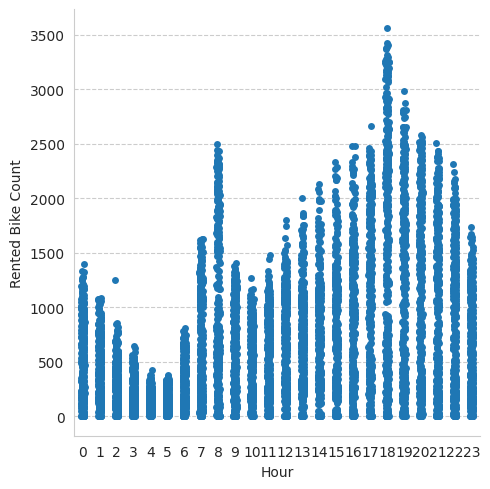

<Figure size 2000x1600 with 0 Axes>

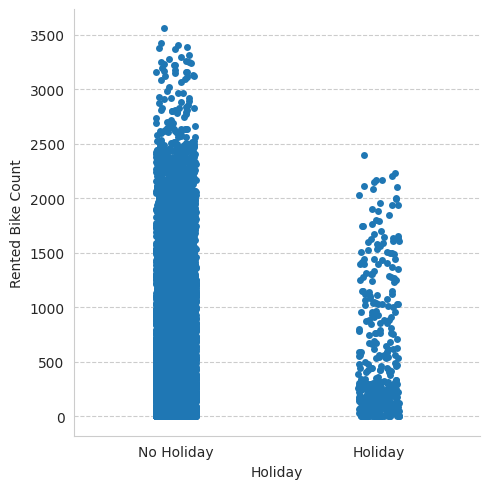

<Figure size 2000x1600 with 0 Axes>

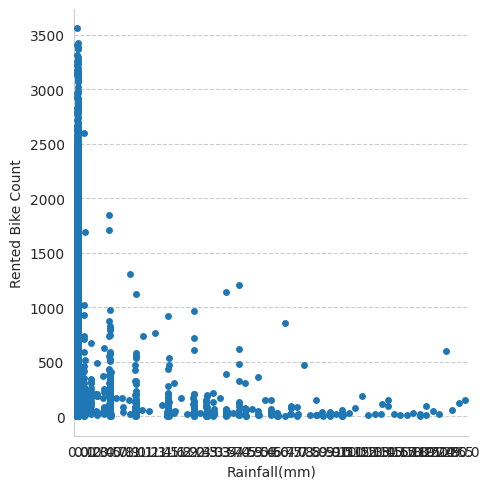

<Figure size 2000x1600 with 0 Axes>

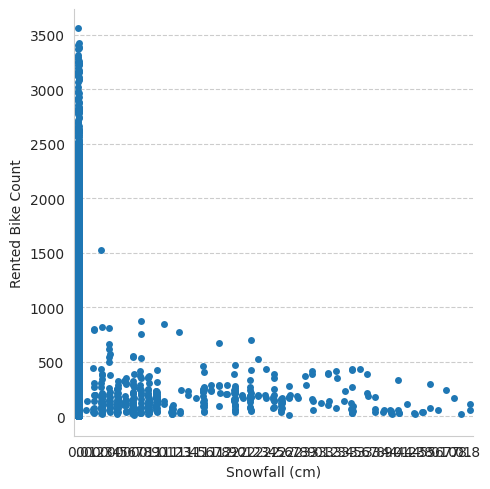

<Figure size 2000x1600 with 0 Axes>

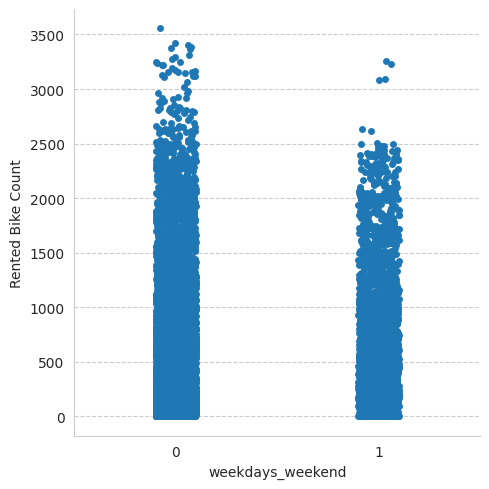

In [33]:
# ploting cat plot on some feature to get more information

feature_list=["Hour","Holiday",'Rainfall(mm)','Snowfall (cm)','weekdays_weekend']
for feature in feature_list:
  plt.figure(figsize=(10,8),dpi=200)
  sns.catplot(x=feature,y='Rented Bike Count',data=df)
  plt.show()

Conclusion:

**From hour v/s rented bike**
- we can clearly see there is high demand of Rented bike between the office hours.

**From working-nonworking v/s rented bike**

- As cleared from 2nd plot working days has comparatively high demand of rented bike as compared to non working day

**From Rainfall v/s rented bike**

- we can see that if Rainfall increase demand of Rented Bike Decreases


**From Snowfall v/s rented bike**

- we can see that if Snowfall increase demand of Rented Bike Decreases

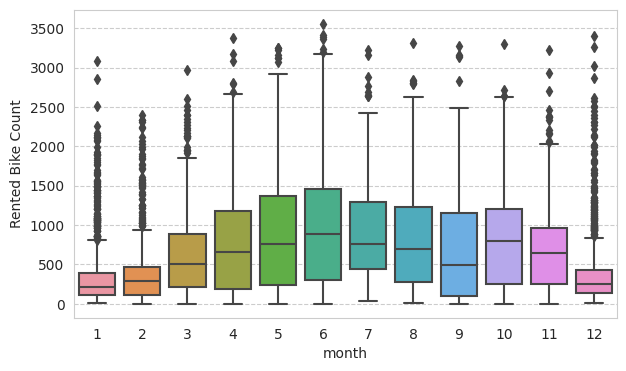

In [34]:
plt.figure(figsize=(7,4),dpi=100)
sns.boxplot(x='month',y='Rented Bike Count',data=df)
plt.show()

Conclusion:

- we can see that there less demand of Rented bike in the month of December, january,February i.e during winter seasons

- Also demand of bike is maximum during May,june,july i.e Summer seasons

# Functions

## Creating Function to train linear models and calculate scores

In [35]:
#creating list of matrix to store the evaluation matrix of all model
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]


In [36]:
# making a function to train and evaluate linear model
def train_linear_model (model,X_train,y_train,X_test,y_test):

#training the model
  model.fit(X_train,y_train)

  #predicting the values
  pred = model.predict(X_test)
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  print('\n================Evalution Matrix=========================\n')

  #finding mean_squared_error
  MSE  = mean_squared_error(y_test**2,pred**2)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(y_test**2,pred**2)
  print("R2 :" ,r2)
  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)

  print('\n================Evalution Matrix=========================\n')


#appending metrice to list
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)

  # ploting the line graph of actual and predicted values
  print('\
  =========================================================\
  Evalution Graph\
  ===================================================\n')
  plt.figure(figsize=(20,10))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

## creating function to run diffirent models

In [37]:


def run_model(model,X_train,y_train,X_test,y_test):

    # Fit Model
    model.fit(X_train,y_train)

    # Get Metrics

    preds = model.predict(X_test)

    import math
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    print('\n================Evalution Matrix=========================\n')
    MSE  = mean_squared_error(y_test,preds)
    print("MSE :" , MSE)

    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)
    r2 = r2_score(y_test,preds)
    print("R2 :" ,r2)
    adj_r2=1-(1-r2_score(y_test,preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2)

    train_class_preds = linear_model.predict(X_train)

    print('\n================Evalution Matrix=========================\n')

    mean_sq_error.append(MSE)
    root_mean_sq_error.append(RMSE)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)

    #ploting
    print('\
    =========================================================\
    Evalution Graph\
    ===================================================\n')
    plt.figure(figsize=(20,10))
    plt.plot(np.array(y_test[:100]))
    plt.plot(preds[:100])
    plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
    plt.show()

## creating function to get feature importance

In [38]:
def get_features_importance (optimal_model,X_train):
  '''
  shows the graph of feature importance
  '''
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()


## lime tablular

In [39]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=f466e6fe591a9314053416bb0486ccc8f78ee7d1d21e4f2a8997a8d27899933e
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [40]:
# LIME SECTION

import lime
import lime.lime_tabular
def LimeTabularExplainer_table(model,instance,num_features,dependent_var):

  # vaariable to store feature names
  # X=df.drop(dependent_var,axis=1)
  # feature_names =list(X.columns)
  X=X_test
  feature_names =list(X_test.columns)

  explainer = lime.lime_tabular.LimeTabularExplainer(X.values,feature_names=feature_names,mode='regression')

  # selecting the instace to explain
  choosen_instance = X.reset_index(drop=True).loc[[instance]].values[0]
  exp = explainer.explain_instance(choosen_instance, model.predict, num_features=num_features)
  exp.show_in_notebook(show_table=True)


# Train | Test Split for LR

In [41]:
# Train - Spliting  data
X=final_df.drop(['Rented Bike Count'],axis=1)

In [42]:
X.shape

(8760, 16)

In [43]:
y=np.sqrt(final_df['Rented Bike Count'])

In [44]:
#spliting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [45]:
#scaling data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

# Linear Regresseion

In [46]:
# appying linearRegression
from sklearn.linear_model import LinearRegression

In [47]:
#creating linear regression model
linear_model= LinearRegression()


================Evalution Matrix=========================

MSE : 175590.55287332056
RMSE : 419.03526447462696
R2 : 0.5729108337712394
Adjusted R2 :  0.5697661367350406

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



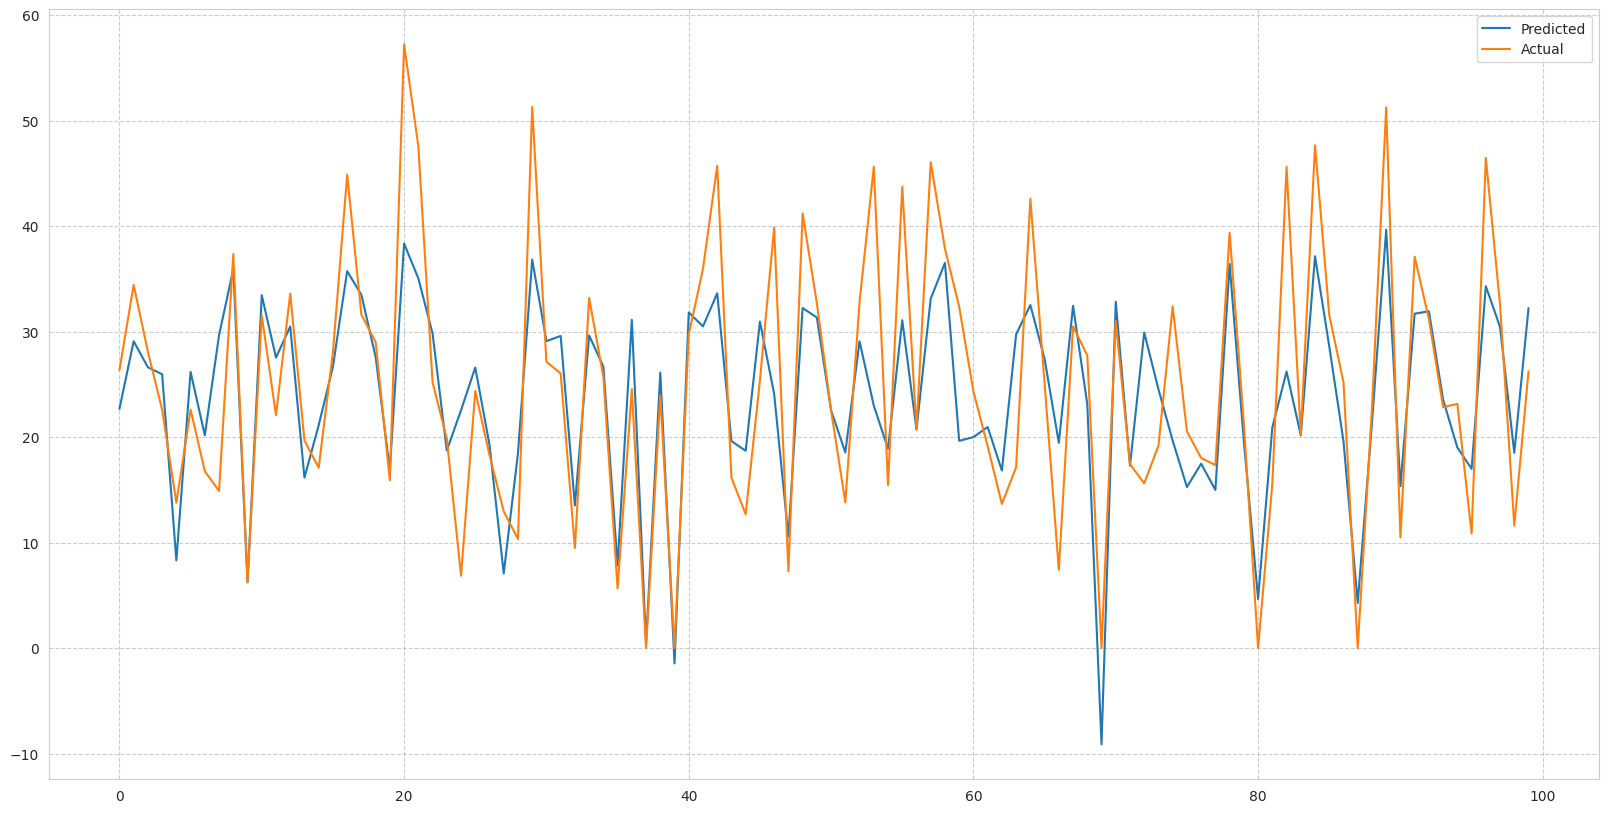

In [48]:
train_linear_model(linear_model, X_train, y_train, X_test, y_test)

# Regularisation

## Lasso Regression

In [49]:
#importing lasso
from sklearn.linear_model import Lasso

In [50]:
# finding the best parameters for lasso by gridsearchcv
from sklearn.model_selection import GridSearchCV
lasso_model = Lasso()
#setting the parameters of the lasso model
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_grid = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)


================Evalution Matrix=========================

MSE : 175560.90711843758
RMSE : 418.9998891627987
R2 : 0.5729829411854939
Adjusted R2 :  0.569838775082856

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



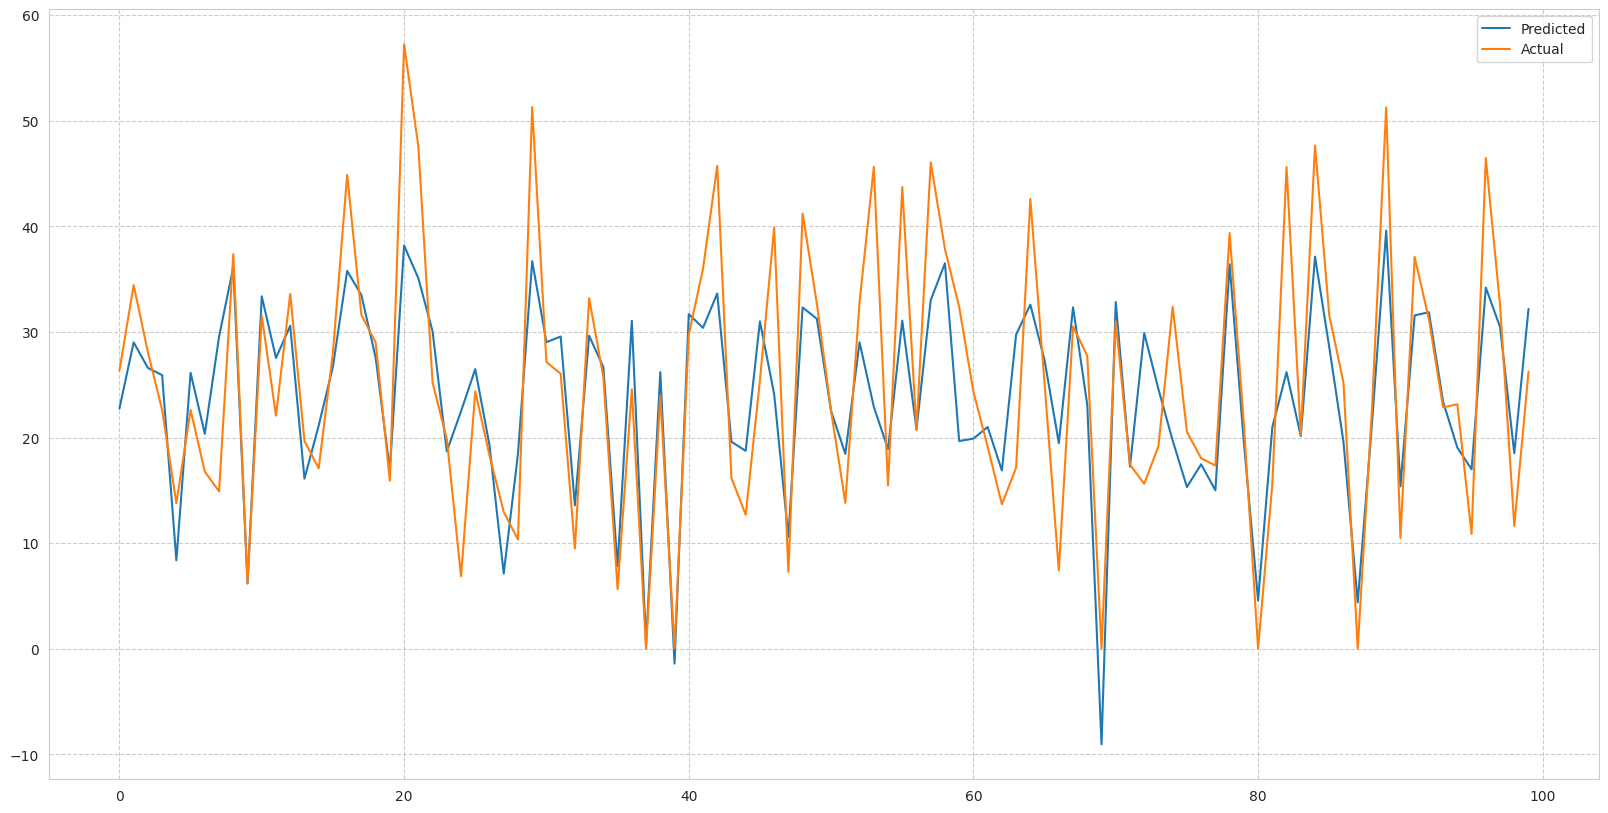

In [51]:
# calling train_linear_model to train,fit and evalution of lasso model
train_linear_model(lasso_grid,X_train,y_train,X_test,y_test)

##Ridge Regression

In [52]:
# importing the Ridge regression model
from sklearn.linear_model import Ridge
ridge = Ridge()
# finding the best parameters for ridge model by gridsearchcv
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)


================Evalution Matrix=========================

MSE : 175248.93506569506
RMSE : 418.6274418450074
R2 : 0.5737417512792726
Adjusted R2 :  0.5706031723655443

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



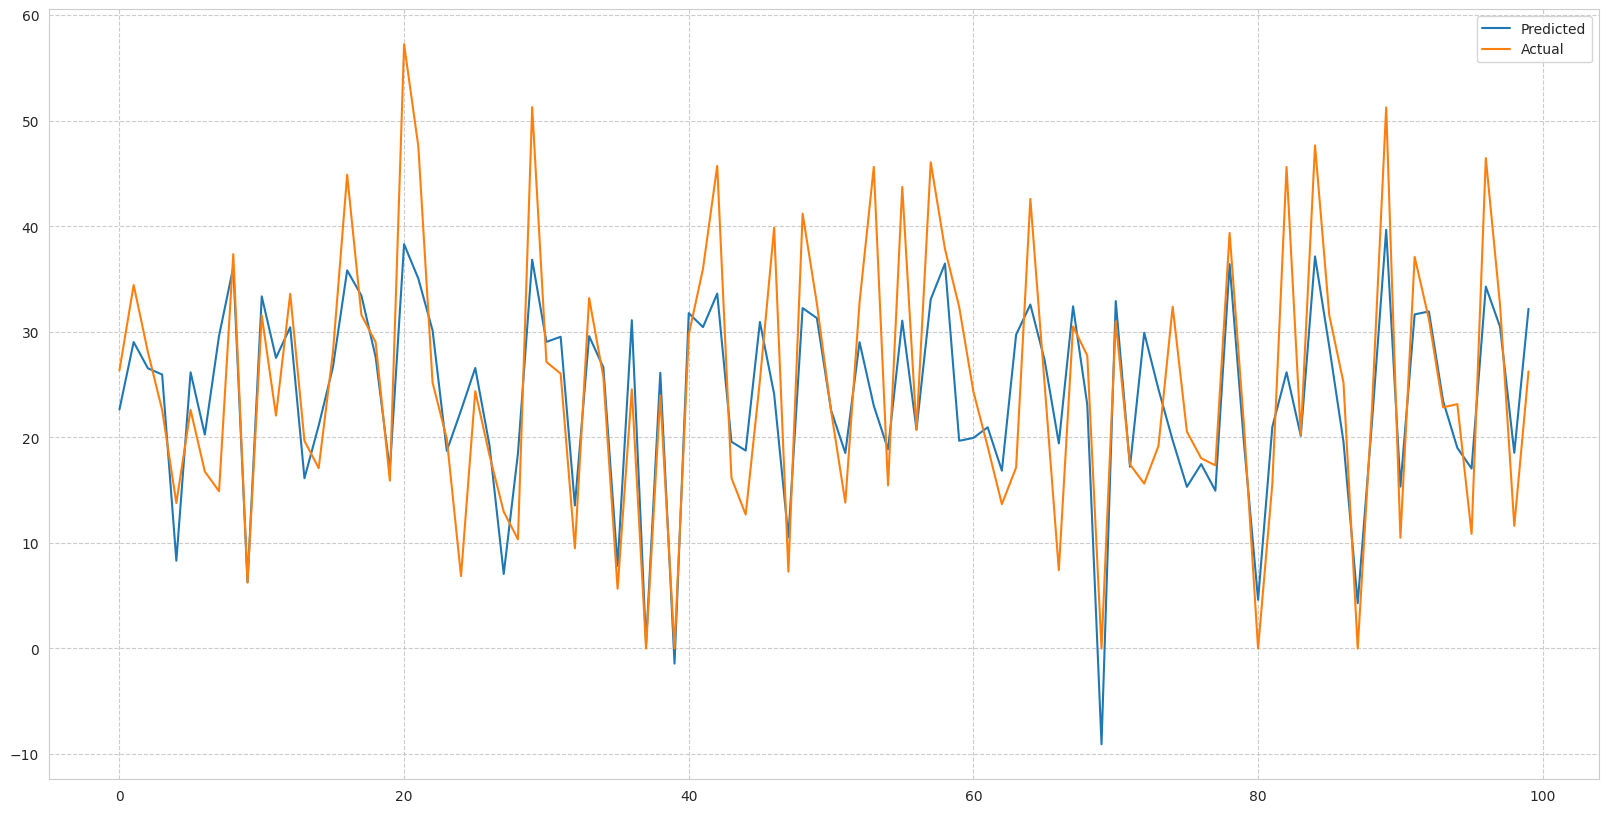

In [53]:
# calling train_linear_model to train,fit and evalution of ridge model
train_linear_model(ridge_grid,X_train,y_train,X_test,y_test)

## ElasticNet Regression

In [54]:
#importing Elasticnet model
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
# finding the best parameters for ridge model by gridsearchcv
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}
elastic_grid = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)


================Evalution Matrix=========================

MSE : 175346.86749857932
RMSE : 418.74439399062925
R2 : 0.5735035500752621
Adjusted R2 :  0.5703632172640354

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



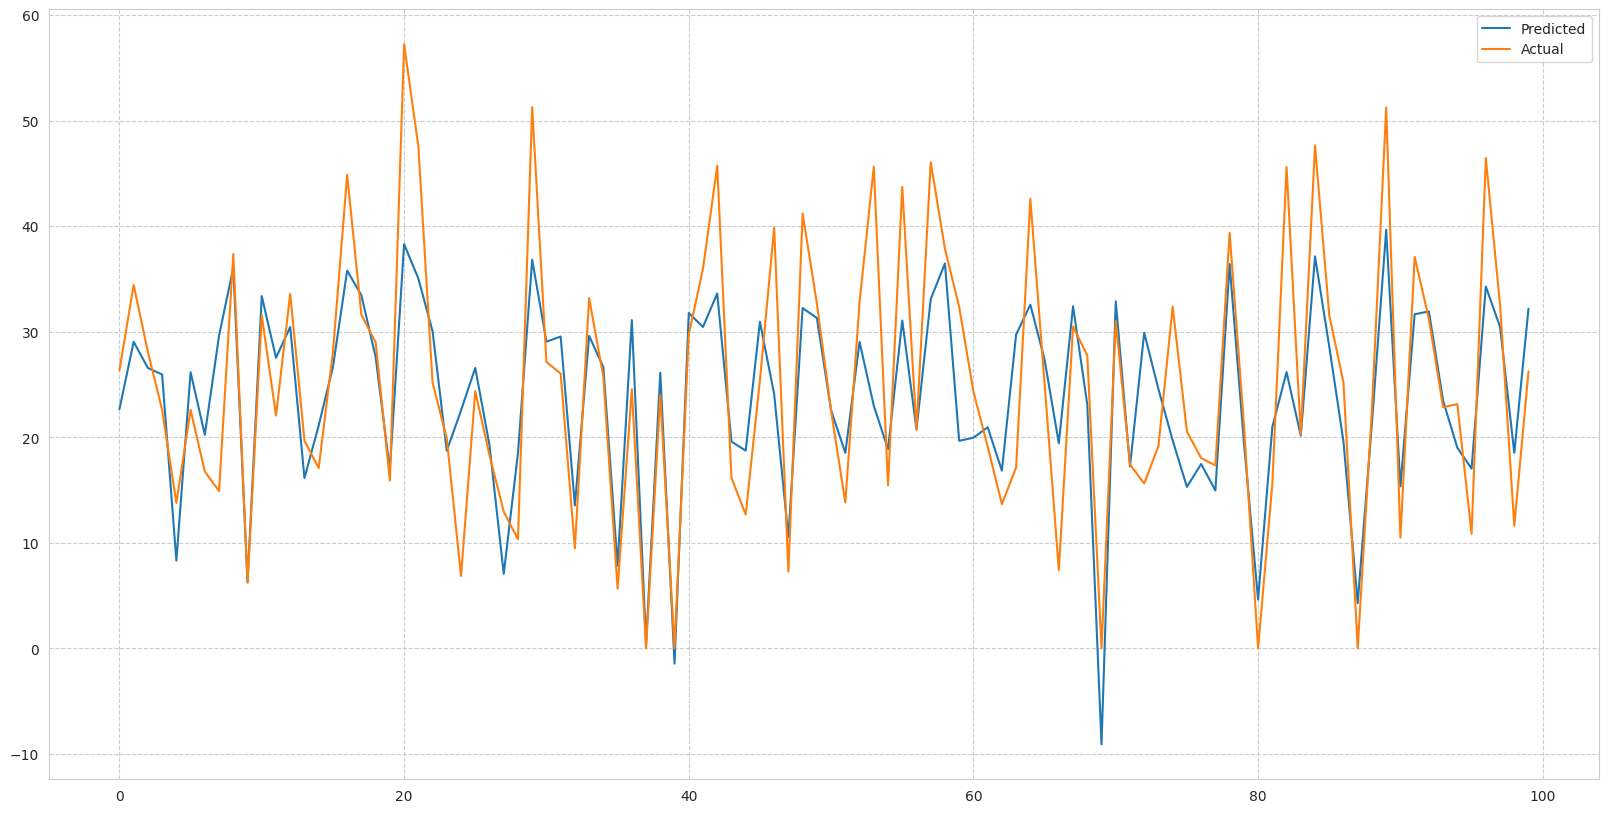

In [55]:
# calling train_linear_model to train,fit and evalution of elasticnet model
train_linear_model(elastic_grid,X_train,y_train,X_test,y_test)

# Polynomial Regression

In [56]:
#creating pipeline to convert x to polynomial feature and apply Linear Regression

from sklearn.pipeline import make_pipeline
#importing polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [57]:
pipe=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())


================Evalution Matrix=========================

MSE : 118205.13966619587
RMSE : 343.8097434137024
R2 : 0.7124894607489991
Adjusted R2 :  0.7103724940540999

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



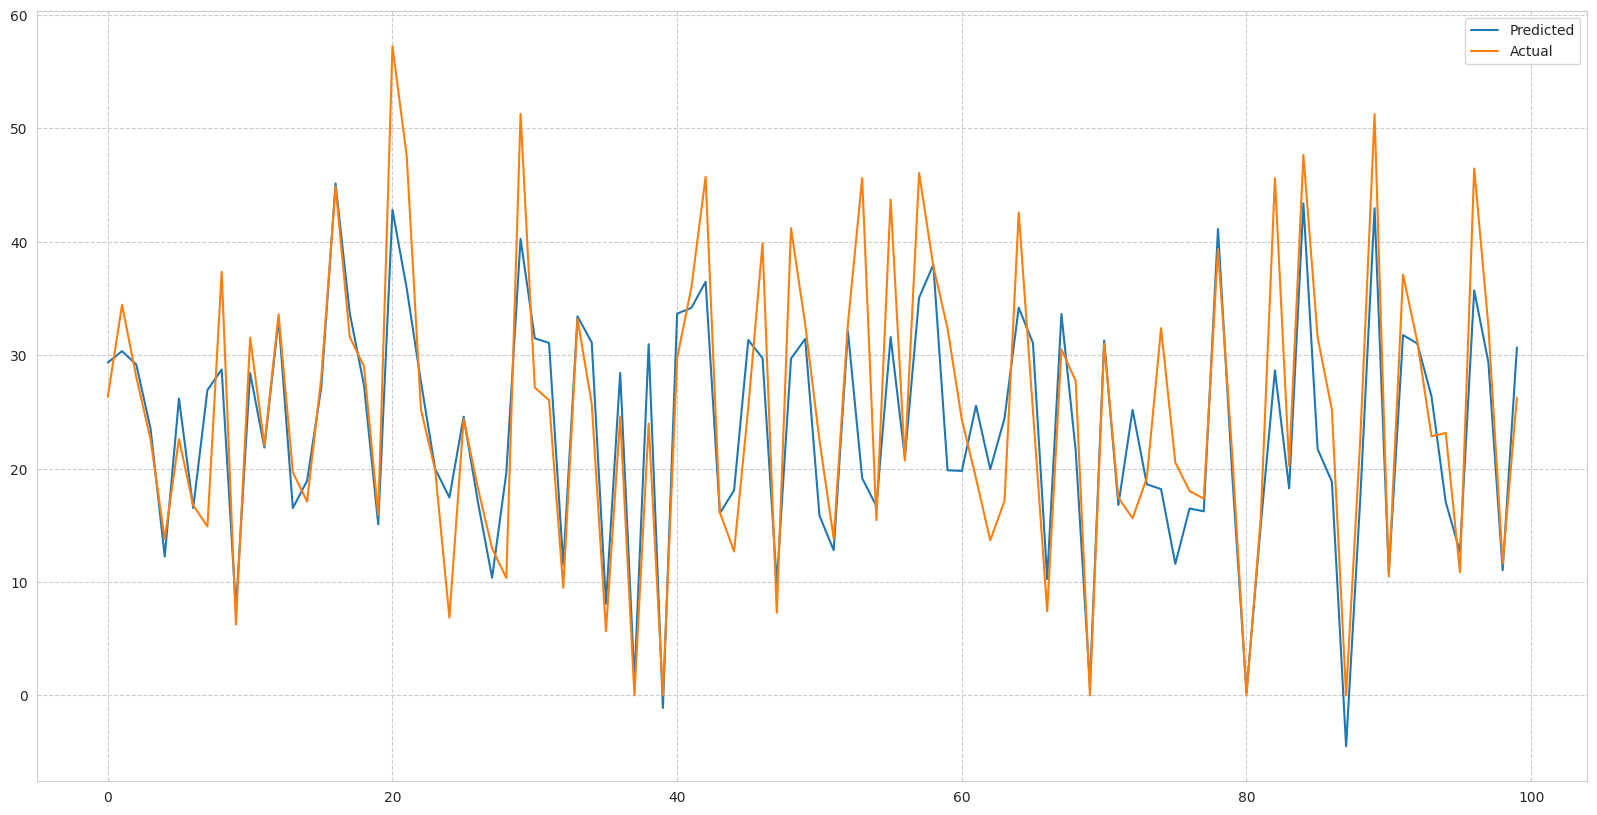

In [58]:
# calling train_linear_model to train,fit and evalution of polynomial model
train_linear_model(pipe,X_train,y_train,X_test,y_test)

# KNN and Tree Based Method

# Train | Test split Data For Tree based methods

In [59]:
#creatin X for independent variable
X=final_df.drop(['Rented Bike Count'],axis=1)

In [60]:
#creating y for dependent variable
y=final_df['Rented Bike Count']

In [61]:
#spliting X and y to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# KNN Regression


In [62]:
#importing Knn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [63]:
#creating model
scaler = MinMaxScaler()

In [64]:
#scaling all the feature by min max scaler
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


================Evalution Matrix=========================

MSE : 83411.75920852358
RMSE : 288.81094025075225
R2 : 0.7961594359879383
Adjusted R2 :  0.7946585390600998

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



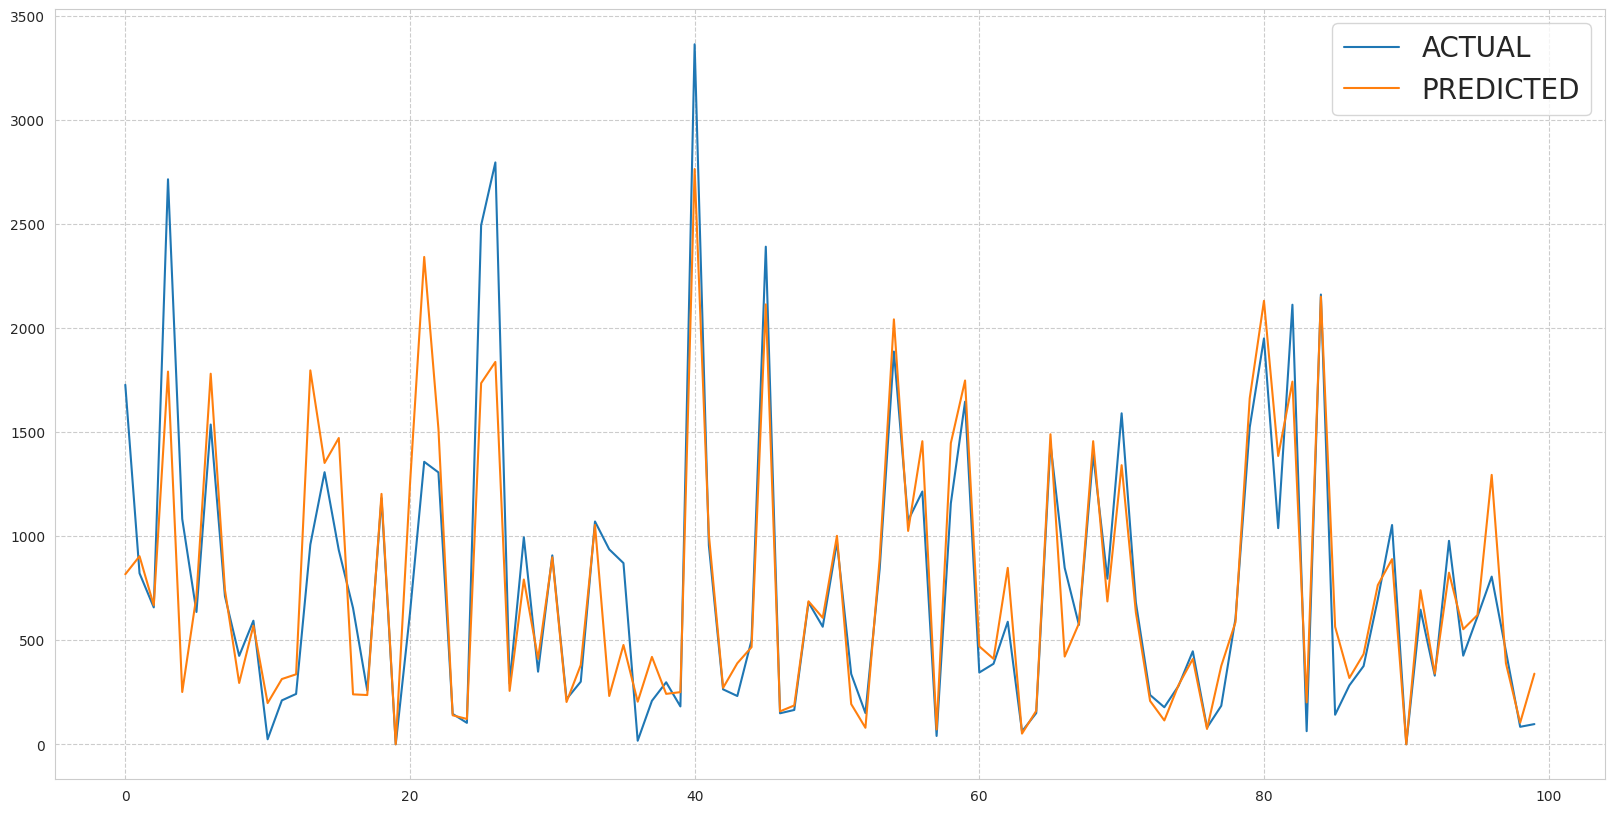

In [65]:
# creating KNN model
knn_model = KNeighborsRegressor(n_jobs=-1)

# finding the best parameters for knn_model by gridsearchcv
param_dict={'n_neighbors':[3,5,7,9,11,13,15,21,23,25]}
knn_grid= GridSearchCV(knn_model,param_grid=param_dict)

# training and evaluating the PolynomialFeatures
run_model(knn_grid,X_train_scaled,y_train,X_test_scaled,y_test)

# Decision Tree Regression

In [66]:
#importing Decision tree regressor
from sklearn.tree import DecisionTreeRegressor


================Evalution Matrix=========================

MSE : 89973.6301369863
RMSE : 299.95604700853477
R2 : 0.7801236218086887
Adjusted R2 :  0.7785046516977541

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



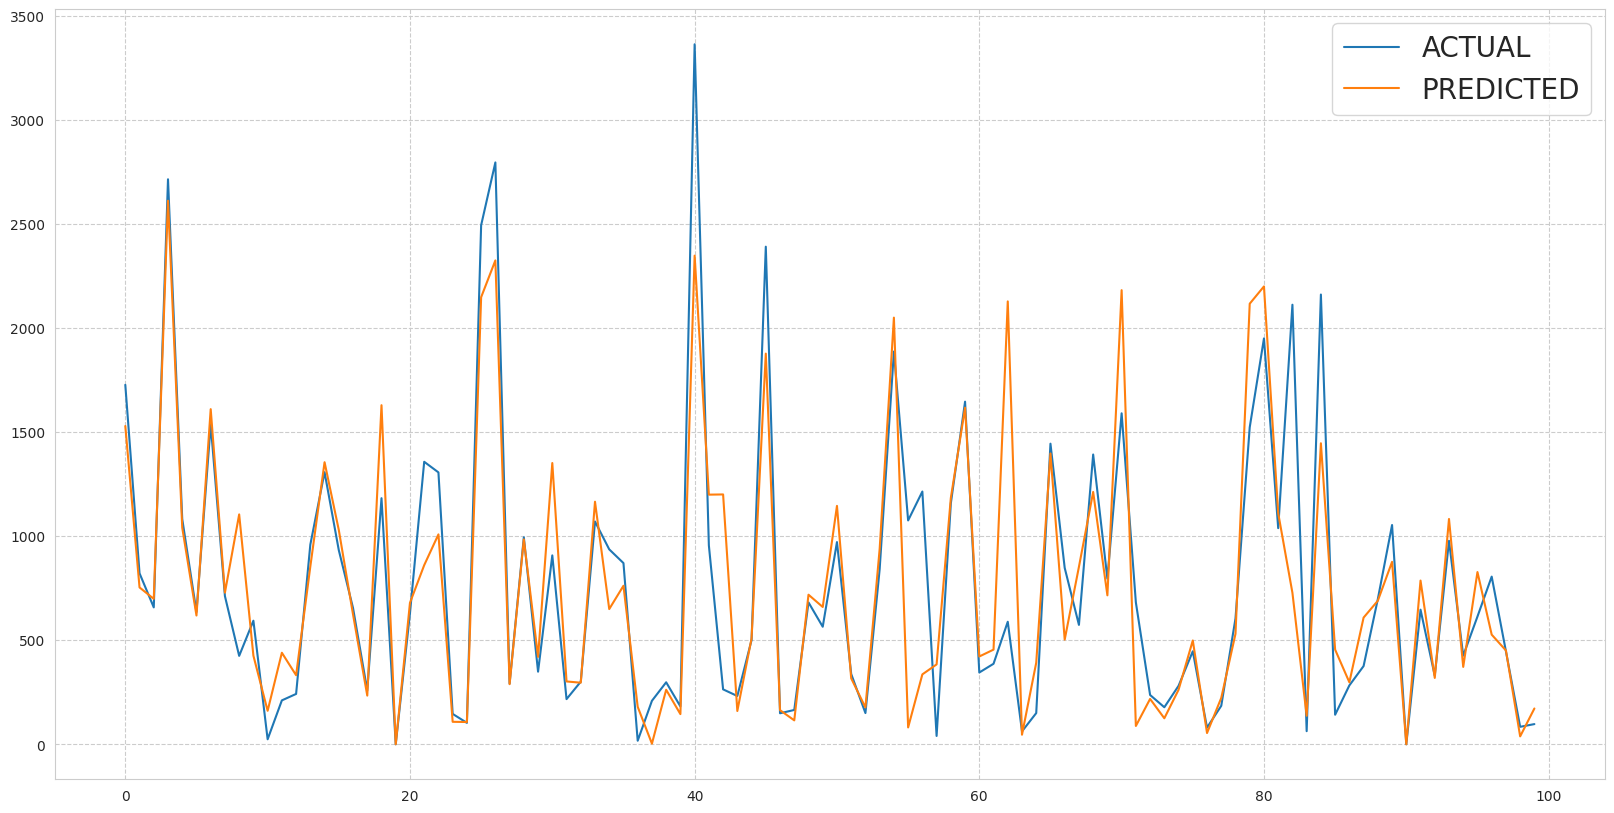

In [67]:
#creating decision tree model
dt_model = DecisionTreeRegressor()
#calling run_model to train,fit and evalution of decision tree model
run_model(dt_model,X_train,y_train,X_test,y_test)

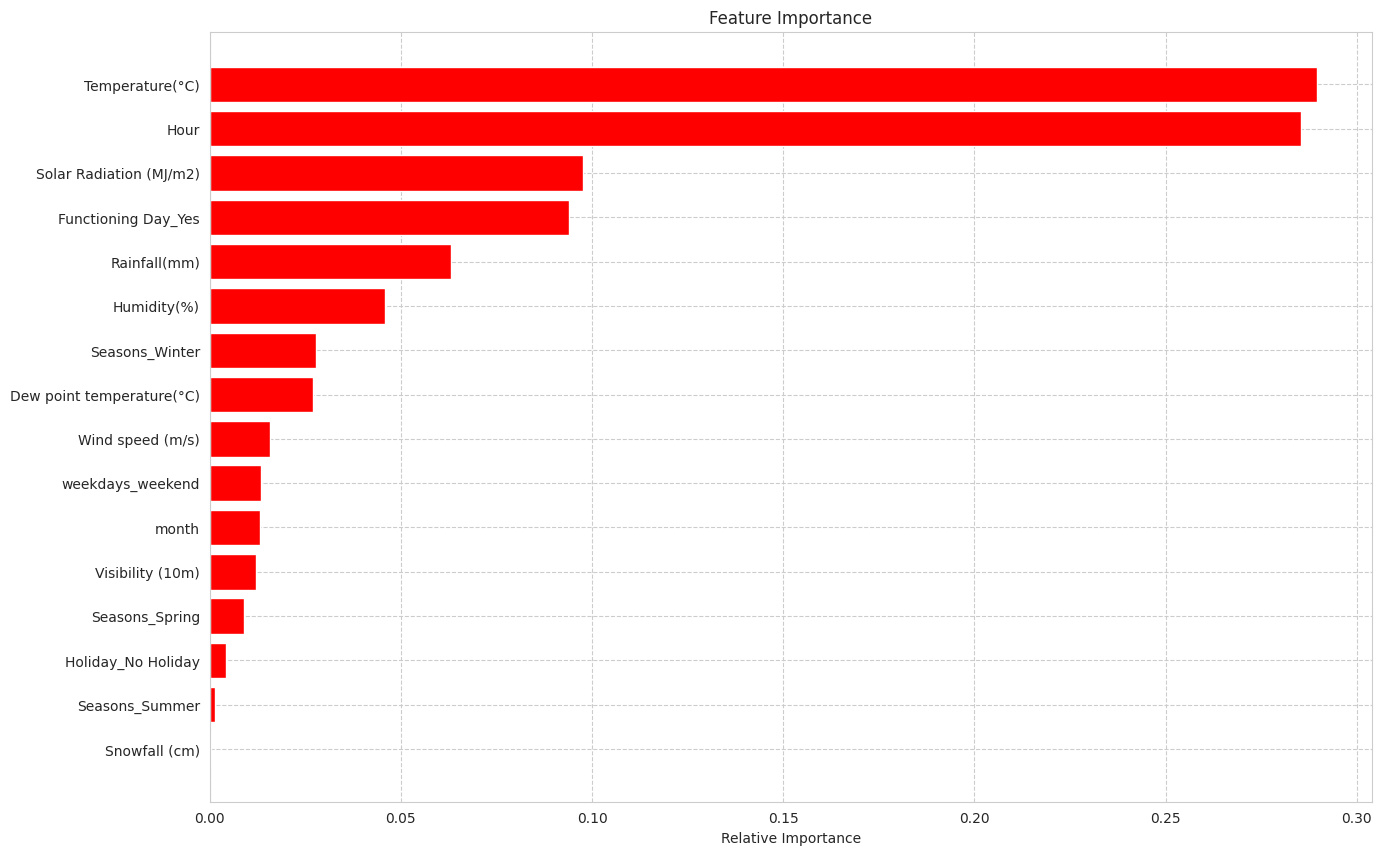

In [68]:
#getting features importance of decision tree
get_features_importance(dt_model,X_train)

# Random Forest

In [69]:
#importing Random forest
from sklearn.ensemble import RandomForestRegressor

In [70]:
#creating model of random forest
rf_model = RandomForestRegressor()


In [71]:
#creating param dict to check random forest with diffirent value of parameter through gridsearch
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

In [72]:
#creating rf_grid model to run rf model with gridsearch
rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)


================Evalution Matrix=========================

MSE : 61953.55092934817
RMSE : 248.9047025054934
R2 : 0.8485987241628894
Adjusted R2 :  0.8474839425644569

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



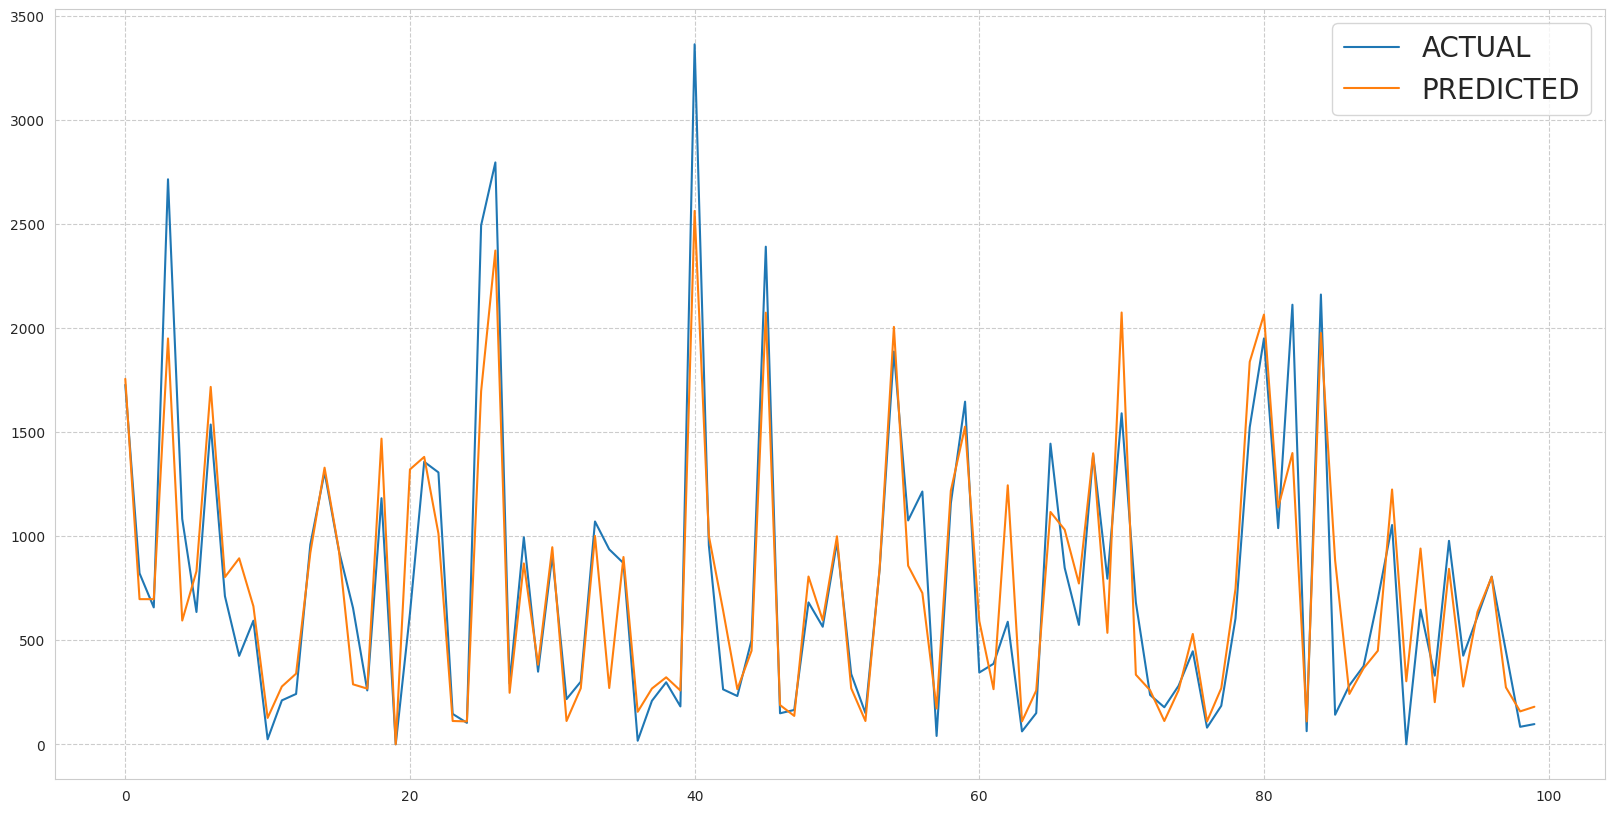

In [73]:
#calling run_model to train,fit and evalution of decision tree model
run_model(rf_grid,X_train,y_train,X_test,y_test)

In [74]:
#optimal rf model
optimal_rf_model=rf_grid.best_estimator_

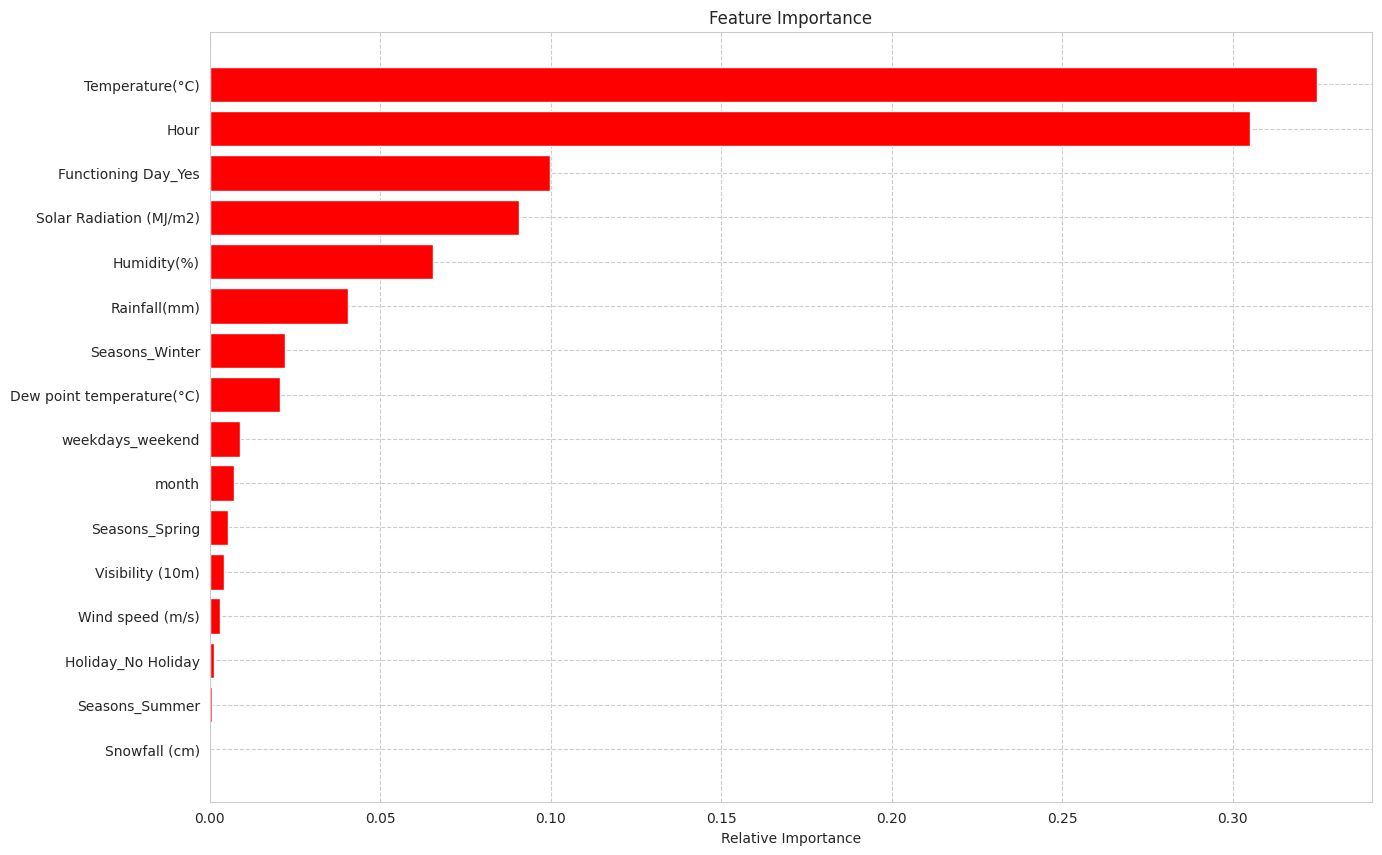

In [75]:
#getting and visualizing features importance  of rf model
get_features_importance(optimal_rf_model,X_train)

# Gradient Boosting

In [76]:
#importing Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

In [77]:
#creating model of Gradient Boosting
gb_model=GradientBoostingRegressor()

In [78]:
# creating param dict to check diffirent value of parameter
n_estimators=[80,100,150]
max_depth=[15,20,30]

params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [79]:
#grid search for gradient bossting
gb_grid= GridSearchCV(gb_model,param_grid=params,verbose=0)


================Evalution Matrix=========================

MSE : 54836.3264226041
RMSE : 234.1715747536496
R2 : 0.8659917041386305
Adjusted R2 :  0.8650049886605901

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



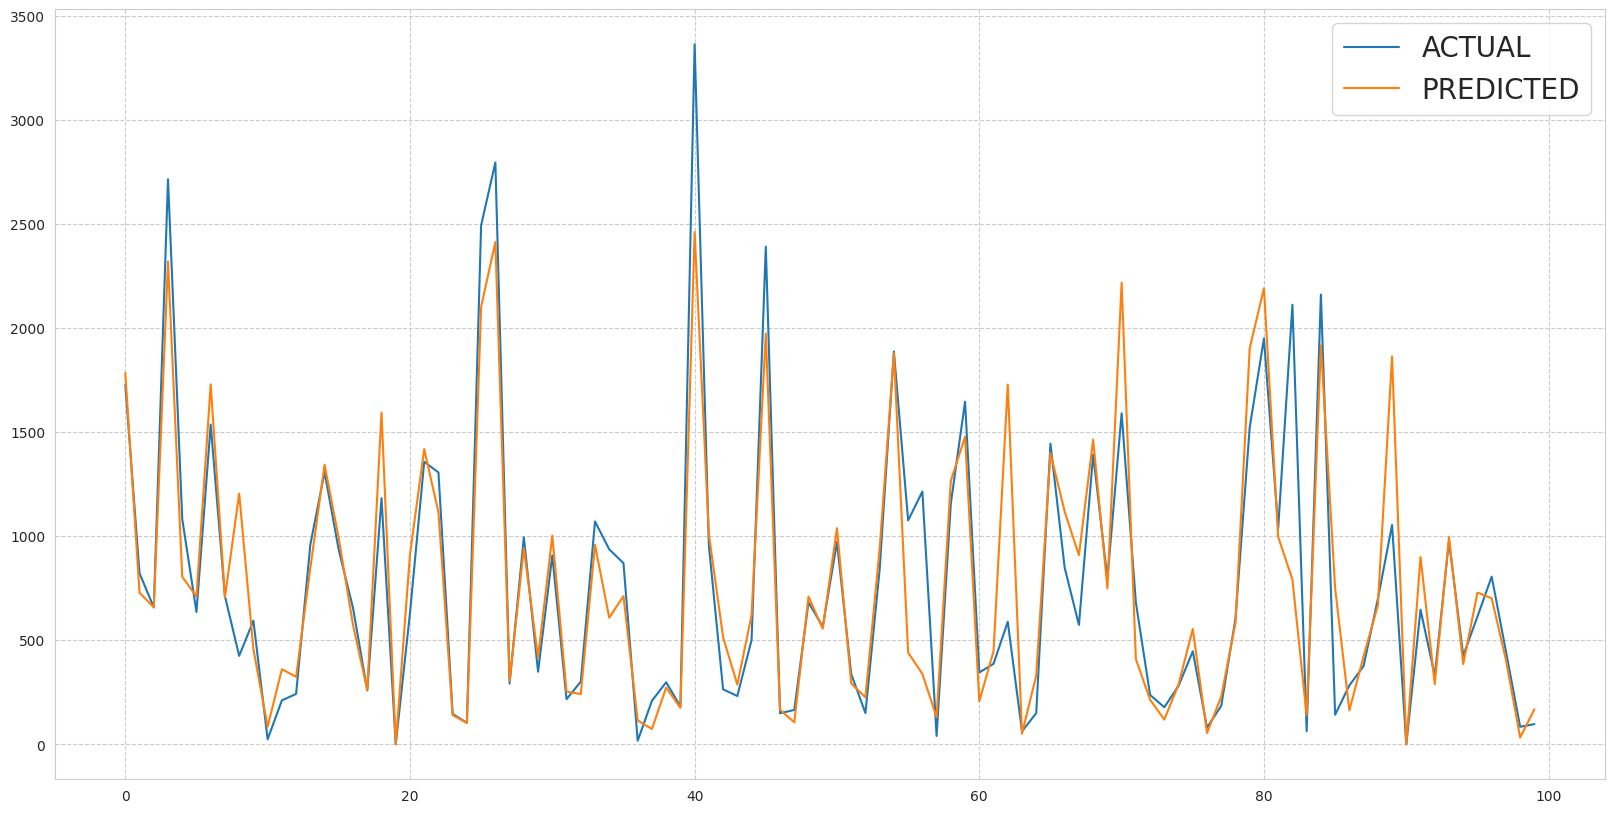

In [80]:
#calling run_model to train,fit and evalution of gradient boosting model
run_model(gb_grid,X_train,y_train,X_test,y_test)

In [81]:
#getting best estimator of GB model given by gb_grid model
optimal_gb_model=gb_grid.best_estimator_

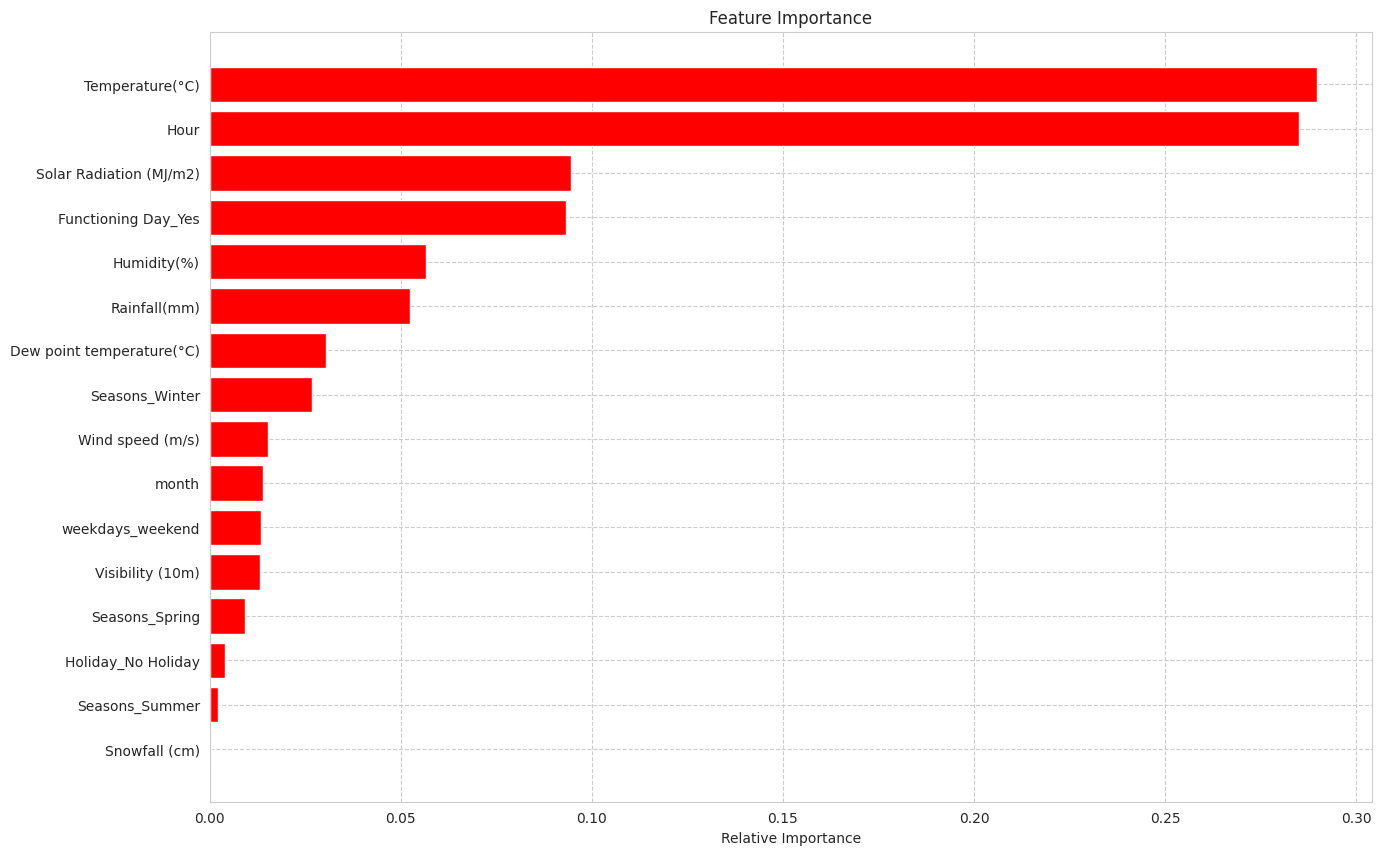

In [82]:
#getting and visualizing features_importance of gradient boosting
get_features_importance(optimal_gb_model,X_train)

# eXtreme Gradient Boosting

In [83]:
#importing XGBoost Regressor
from xgboost import XGBRegressor

In [84]:
#creating Xgboost model
xgb_model=XGBRegressor()

In [85]:
#creating param dict for gridsearch
n_estimators=[80,100,150]
max_depth=[15,20,30]


params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [86]:
#creating xgb grid model
xgb_grid= GridSearchCV(xgb_model,param_grid=params,verbose=0)


================Evalution Matrix=========================

MSE : 42764.78041172761
RMSE : 206.7964709847042
R2 : 0.895491990077968
Adjusted R2 :  0.8947224879340414

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



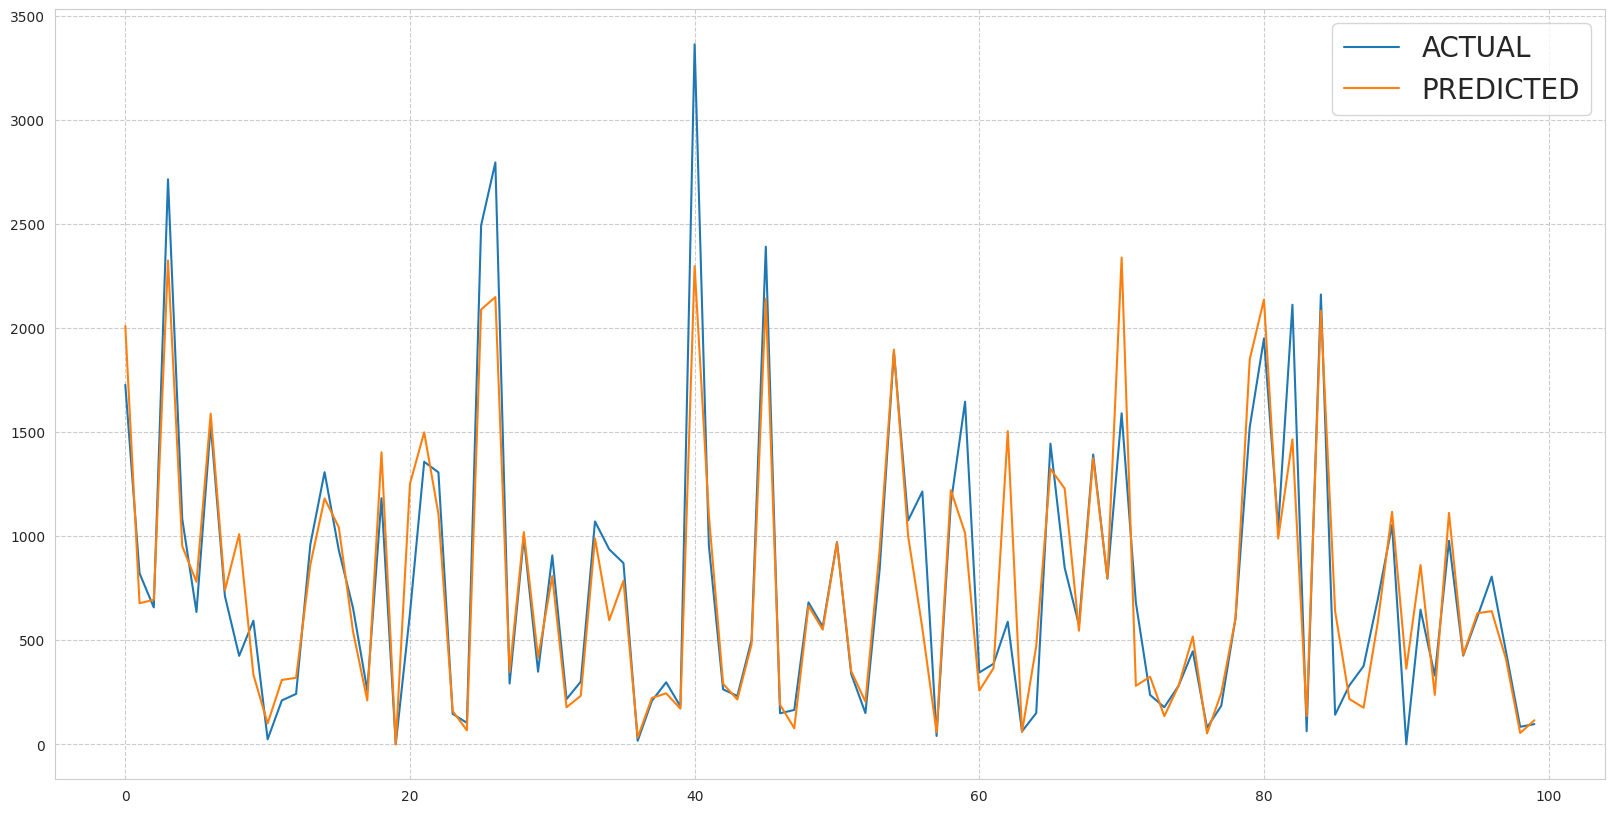

In [87]:
#calling run_model to train,fit and evalution of xgb_grid model
run_model(xgb_grid,X_train,y_train,X_test,y_test);

In [88]:
#getting best estimator of xgb model given by xgb grid model
optimal_xgb_model=xgb_grid.best_estimator_

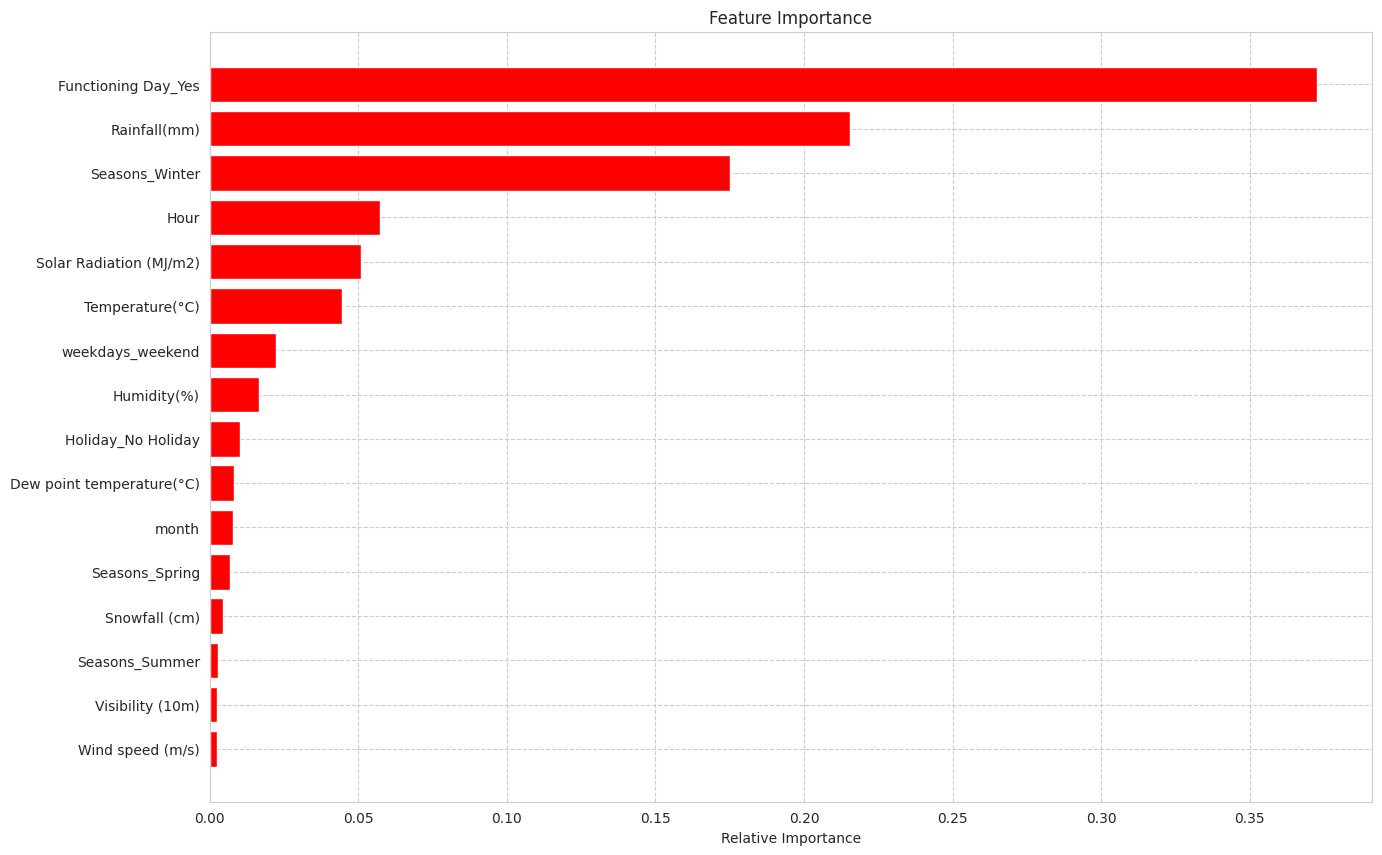

In [89]:
#getting best param of rf model given by xgb_grid model
get_features_importance(optimal_xgb_model,X_train)

# CatBoost

In [90]:
#installing catboost
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.3 MB/s eta 0:00:00


In [91]:
#importing cat boost Regressor
from catboost import CatBoostRegressor

In [92]:
# creating Catboost model
cb_model=CatBoostRegressor(verbose=0)


================Evalution Matrix=========================

MSE : 36706.5353729677
RMSE : 191.58949703198164
R2 : 0.910297049908164
Adjusted R2 :  0.9096365587892181

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



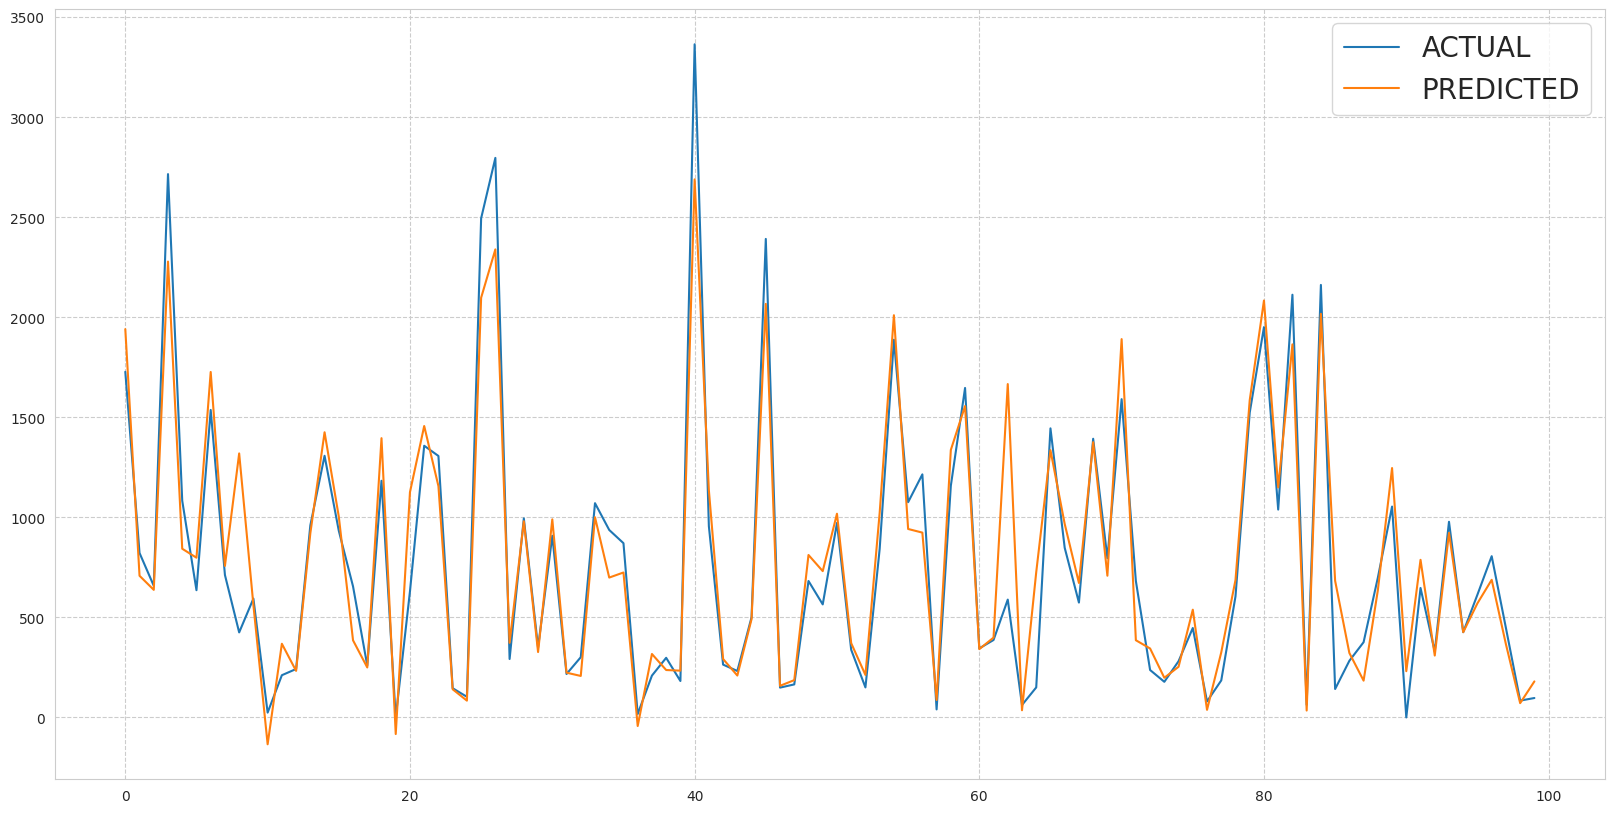

In [93]:
#calling run_model to train,fit and evalution of catboost model
run_model(cb_model,X_train,y_train,X_test,y_test)

In [94]:
#checking params of cat boost model
cb_model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'learning_rate': 0.05512600019574165,
 'score_function': '

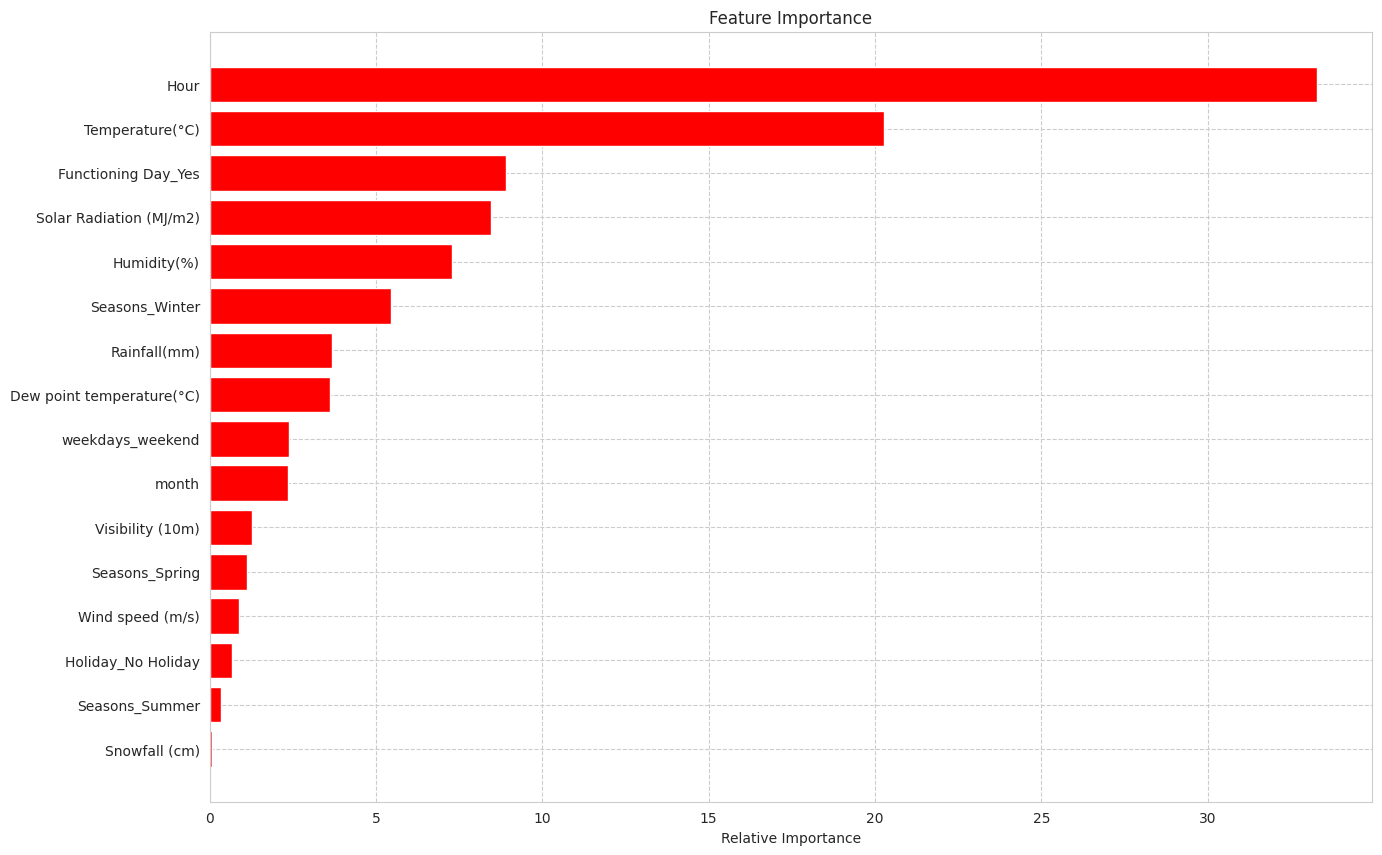

In [95]:
#getting and visualizing features importance of catboost model
get_features_importance(cb_model,X_train)

#lightGBM

In [96]:
import lightgbm as lgb

In [97]:
lgbr=lgb.LGBMRegressor()

In [98]:
# finding the best parameters for XGBRegressor by gridsearchcv
lgbr_para={'n_estimators': [150,200,250],'max_depth': [7,10,13]}
lgbr_grid=GridSearchCV(estimator=lgbr,param_grid=lgbr_para,cv=5,scoring='neg_mean_squared_error',verbose=5,n_jobs=-1)

Fitting 5 folds for each of 9 candidates, totalling 45 fits

================Evalution Matrix=========================

MSE : 35410.75375394222
RMSE : 188.17745283094416
R2 : 0.9134636640470446
Adjusted R2 :  0.9128264890009115

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



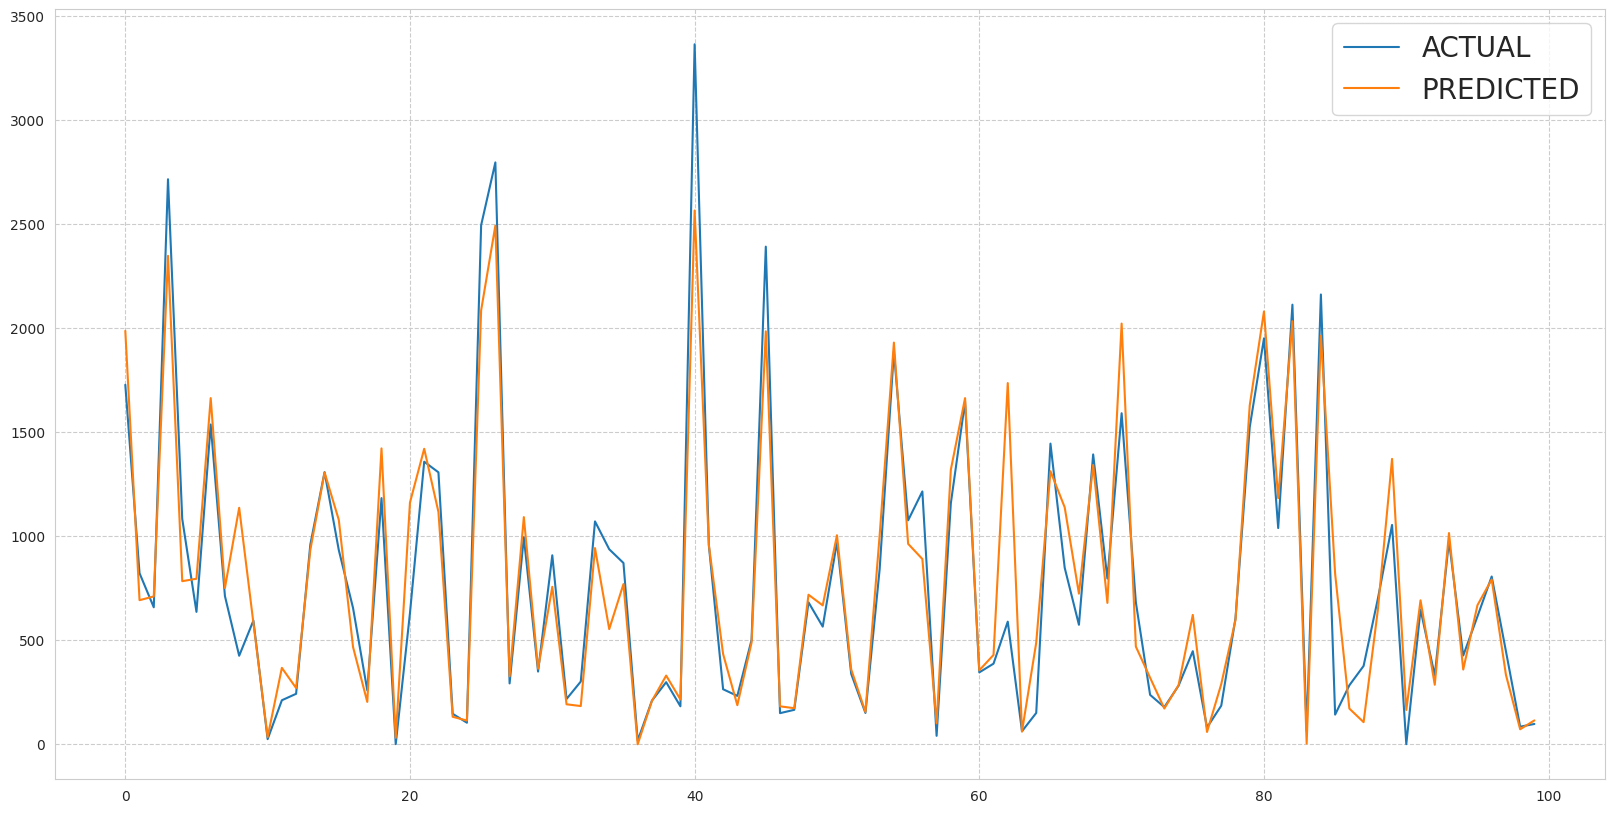

In [99]:
#calling run_model to train,fit and evalution of catboost model
run_model(lgbr_grid,X_train,y_train,X_test,y_test)

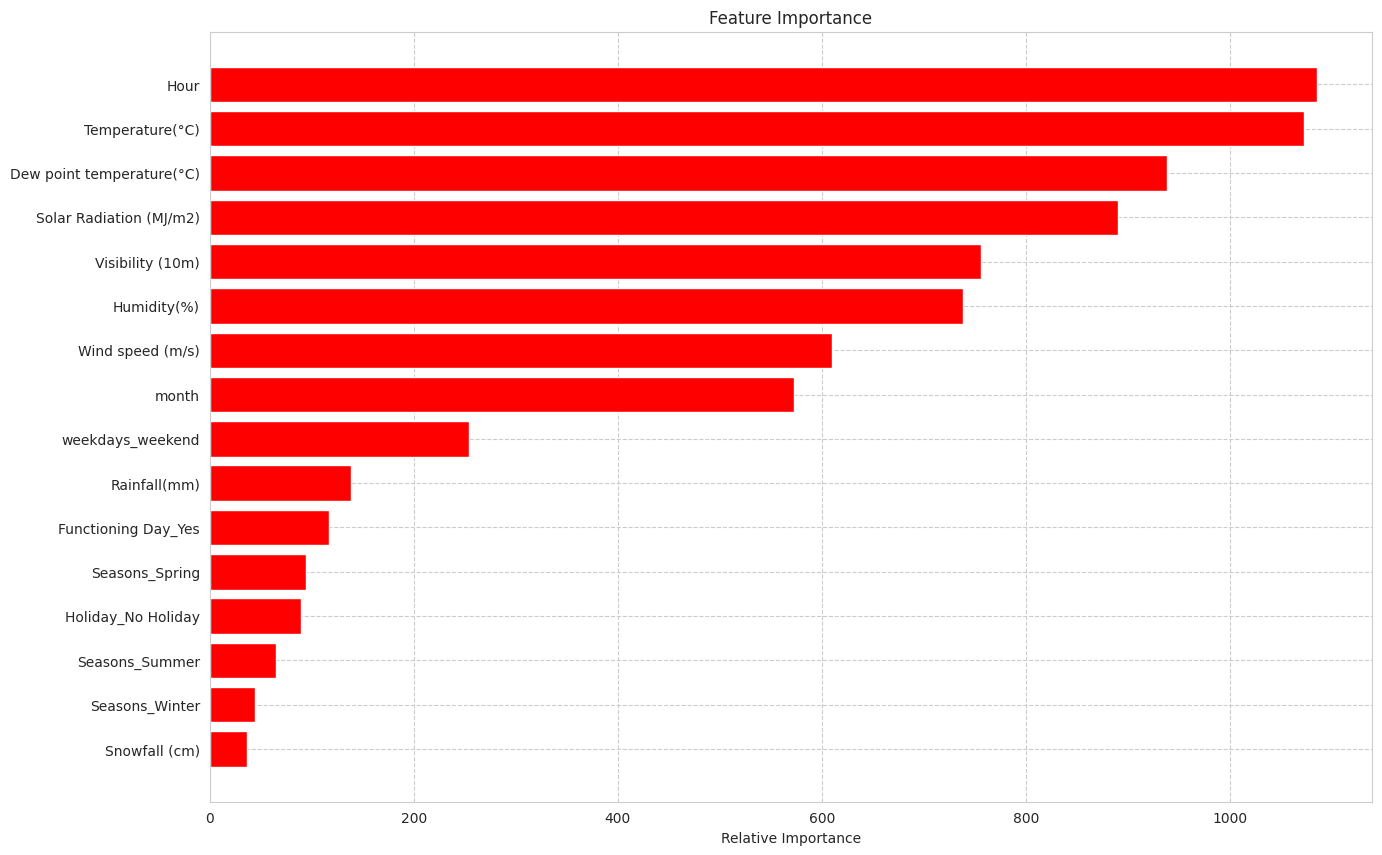

In [100]:
#getting and visualizing features importance of catboost model
get_features_importance(lgbr_grid.best_estimator_,X_train)

# Combined Evaluation Matrix of All the models

In [101]:
#creating dictionary to store all the metrices
all_model_matrices={'Mean_square_error':mean_sq_error,'Root_Mean_square_error':root_mean_sq_error,'R2':r2_list,'Adjusted_R2':adj_r2_list}

In [102]:
#list of all model made ,'Gradient_Boosting',,'CATBoost'
model_name=['Linear','Lasso','Ridge','Elasticnet','Polynomial','K-Nearyest_Neighbor','Decision_Tree','Random_Forest','Gradient_Boosting','Xtreme_GB','CATBoost','lightGBM']

In [103]:
#converting dictionary to dataframe fro easy visual
matrices_df=pd.DataFrame.from_dict(all_model_matrices,orient="index",columns=model_name)

In [104]:
matrices_df

Linear          Lasso          Ridge  \
Mean_square_error       175590.552873  175560.907118  175248.935066   
Root_Mean_square_error     419.035264     418.999889     418.627442   
R2                           0.572911       0.572983       0.573742   
Adjusted_R2                  0.569766       0.569839       0.570603   

                           Elasticnet     Polynomial  K-Nearyest_Neighbor  \
Mean_square_error       175346.867499  118205.139666         83411.759209   
Root_Mean_square_error     418.744394     343.809743           288.810940   
R2                           0.573504       0.712489             0.796159   
Adjusted_R2                  0.570363       0.710372             0.794659   

                        Decision_Tree  Random_Forest  Gradient_Boosting  \
Mean_square_error        89973.630137   61953.550929       54836.326423   
Root_Mean_square_error     299.956047     248.904703         234.171575   
R2                           0.780124       0.848599           0.865992   
Adjusted_R2                  0.778505       0.847484           0.865005   

                           Xtreme_GB      CATBoost      lightGBM  
Mean_square_error       42764.780412  36706.535373  35410.753754  
Root_Mean_square_error    206.796471    191.589497    188.177453  
R2                          0.895492      0.910297      0.913464  
Adjusted_R2                 0.894722      0.909637      0.912826

In [105]:
#transposing matrices_df for easy and clear view and saving that as new final matrices df
final_matrices=matrices_df.transpose().reset_index().rename(columns={'index':'Models'})

In [106]:
final_matrices

Models  Mean_square_error  Root_Mean_square_error        R2  \
0                Linear      175590.552873              419.035264  0.572911   
1                 Lasso      175560.907118              418.999889  0.572983   
2                 Ridge      175248.935066              418.627442  0.573742   
3            Elasticnet      175346.867499              418.744394  0.573504   
4            Polynomial      118205.139666              343.809743  0.712489   
5   K-Nearyest_Neighbor       83411.759209              288.810940  0.796159   
6         Decision_Tree       89973.630137              299.956047  0.780124   
7         Random_Forest       61953.550929              248.904703  0.848599   
8     Gradient_Boosting       54836.326423              234.171575  0.865992   
9             Xtreme_GB       42764.780412              206.796471  0.895492   
10             CATBoost       36706.535373              191.589497  0.910297   
11             lightGBM       35410.753754              188.177453  0.913464   

    Adjusted_R2  
0      0.569766  
1      0.569839  
2      0.570603  
3      0.570363  
4      0.710372  
5      0.794659  
6      0.778505  
7      0.847484  
8      0.865005  
9      0.894722  
10     0.909637  
11     0.912826

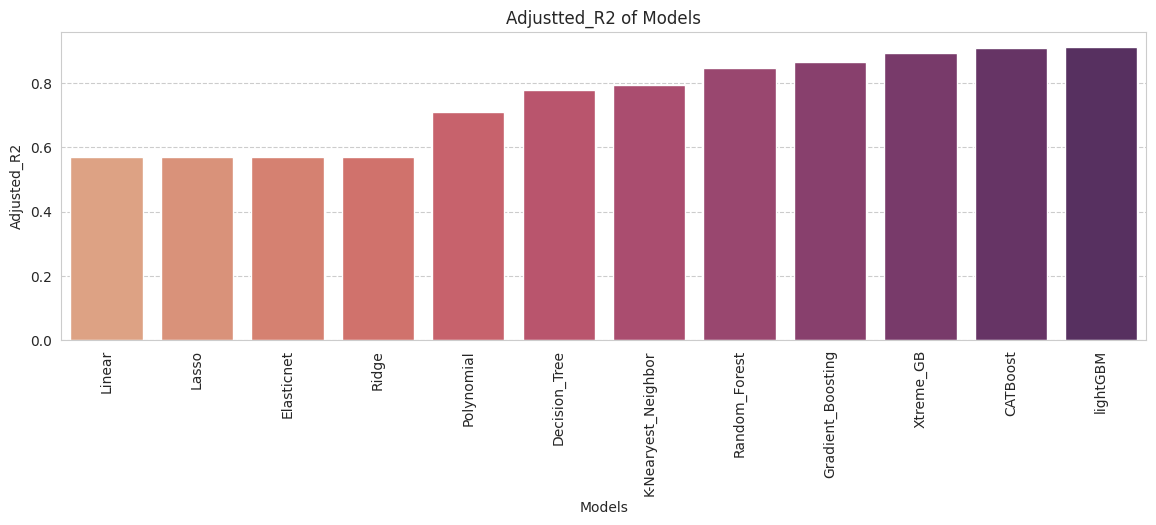

In [107]:
#creating bar plot to visualize the Adjusted R2 of model
plt.figure(figsize=(14,4),dpi=100)
sns.barplot(x='Models',y='Adjusted_R2',data=final_matrices.sort_values('Adjusted_R2'),palette="flare").set(title='Adjustted_R2 of Models')
plt.xticks(rotation=90);

# Model Explainibility

# SHAP

In [108]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 7.4 MB/s eta 0:00:00


In [109]:
from sklearn.tree import export_graphviz
import shap
sns.set_style('darkgrid')

In [110]:
for_instance=2

In [ ]:
# shape for xgboost model
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(xgb_grid.best_estimator_)
# obtain shap values for the first row of the test data
shap_values = explainer(X_test,check_additivity=False)
# # visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[for_instance])

In [ ]:
#shape for catboost model
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(cb_model)
# obtain shap values for the first row of the test data
shap_values = explainer(X_test,check_additivity=False)
# # visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[for_instance])

In [ ]:
#shap for lightGBM model
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(lgbr_grid.best_estimator_)
# obtain shap values for the first row of the test data
shap_values = explainer(X_test,check_additivity=False)
# # visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[for_instance])

#ELI5

In [ ]:
pip install eli5

In [ ]:
import eli5 as eli


In [ ]:
feature_names=list(X_test.columns)

In [ ]:
for_instance=2

In [ ]:
#eli5 for xgboost model
eli.show_prediction(xgb_grid.best_estimator_, X_test.reset_index(drop=True).loc[[for_instance]],
                    feature_names=feature_names,
                    show_feature_values=True)

In [ ]:
#eli5 for lgbr model
eli.show_prediction(lgbr_grid.best_estimator_, X_test.reset_index(drop=True).loc[[for_instance]],
                    feature_names=feature_names,
                    show_feature_values=True)

The green color shows how much the feature contributes to the prediction of the respective class and the weights are positive for the green color.

The red color has negative weights that indicate the feature isn't contributing to the prediction of that class.

As can be observed from the above output, eli5 shows us the contribution of each feature in predicting the output.

# Final Conclusion:

**It is quite evident from the results that lightGBM and Catboost is the best model that can be used for the Bike Sharing Demand Prediction since the performance metrics (mse,rmse) shows lower and (r2,adjusted_r2) show a higher value for the lightGBM and Catboost models !**

**So, we can use either lightGBM or catboost model for the above problem**